# Capítulo 4 - Propriedades de Sistemas de Controle com Realimentação

## Introdução aos Sistemas de Controle

No estudo dos sistemas de controle, o objetivo principal é garantir que um sistema produza uma saída desejada, mesmo diante de variações externas. Para isso, utilizamos um conceito fundamental: a **realimentação** (ou *feedback*). Ela permite que o sistema compare continuamente sua saída real com o valor esperado e corrija eventuais erros, ajustando seu comportamento de forma dinâmica.

Imagine um sistema de controle como um piloto automático em um avião: se uma turbulência desvia a aeronave de sua rota, o sistema detecta o desvio e aplica correções para retomar a trajetória correta. Esse princípio não se limita à engenharia - nosso próprio corpo usa mecanismos similares, como o controle da frequência cardíaca, que se ajusta conforme a necessidade de oxigênio.

## Malha Aberta vs. Malha Fechada

Os sistemas de controle podem operar de duas formas:

1. **Malha Aberta** - Funcionam apenas com base no sinal de entrada, sem monitorar a saída.
   - *Exemplo:* Um forno elétrico programado para desligar após 30 minutos, sem verificar se a temperatura está correta.
   - *Desvantagem:* Se houver perturbações (como uma porta aberta), o sistema não se ajusta.

2. **Malha Fechada** - Utilizam sensores para medir a saída e compará-la com o valor desejado, corrigindo erros em tempo real.
   - *Exemplo:* Um termostato que liga ou desliga o aquecimento conforme a temperatura medida.
   - *Vantagens:* Maior precisão, resistência a perturbações e adaptação a variações internas.

## Matemática da Realimentação

A eficiência de um sistema com realimentação pode ser analisada matematicamente pela **função de transferência**. Para minimizar erros, a expressão **1 + G(s)H(s)** deve ter magnitude maior que 1 em certas regiões. Quanto mais próximo **H(s)** estiver de 1, mais preciso será o controle.

### Sensibilidade a Variações

Em sistemas reais, parâmetros podem mudar devido a desgaste, temperatura ou envelhecimento de componentes. Enquanto sistemas de malha aberta são altamente sensíveis a essas variações, os de malha fechada usam a realimentação para compensá-las automaticamente.

- *Aplicação crítica:* Em telecomunicações, pequenas variações em amplificadores podem distorcer sinais. A realimentação ajuda a manter a estabilidade.

## Resposta Transitória e Estabilidade

Quando um sistema sofre uma perturbação, sua resposta inicial (antes de se estabilizar) é chamada de **resposta transitória**. A realimentação permite ajustar características como:
- **Tempo de subida** - Quão rápido o sistema atinge o valor desejado.
- **Overshoot** - Se a resposta ultrapassa o valor alvo antes de se estabilizar.
- **Tempo de estabilização** - Quanto tempo leva para o sistema parar de oscilar.

A posição dos **polos no plano complexo** define se o sistema será superamortecido, subamortecido ou crítico. A realimentação permite reposicionar esses polos para otimizar o desempenho.

## Rejeição a Perturbações

Perturbações são sinais indesejados que afetam a saída, como ruídos, variações de carga ou mudanças ambientais. Sistemas de malha fechada conseguem detectar e compensar esses efeitos, tornando-se mais robustos.

- *Exemplo industrial:* Uma esteira transportadora ajusta automaticamente sua velocidade se o peso da carga aumentar.

## Erro de Estado Estacionário

Mesmo após a fase transitória, alguns sistemas mantêm um pequeno erro entre a saída e o valor desejado. Esse **erro de regime permanente** pode ser calculado usando o **teorema do valor final**.

- **Malha aberta:** Tendem a ter erros residuais significativos.
- **Malha fechada:** Controladores com ação integral (como os **PID**) conseguem eliminar esse erro completamente.

## Desafios da Realimentação

Apesar das vantagens, a implementação de sistemas com realimentação traz alguns desafios:
1. **Complexidade aumentada** - Exige sensores, atuadores e processamento adicional.
2. **Redução do ganho** - Pode diminuir a eficiência em alguns casos.
3. **Risco de instabilidade** - Ganhos muito altos podem causar oscilações ou até perda de controle.

## Aplicações Práticas

A realimentação está presente em diversos sistemas avançados:
- **Máquinas de escavação** (como as usadas no Canal da Mancha) ajustam a força de perfuração conforme o tipo de solo.
- **Robôs exploradores em Marte** usam *feedback* para se adaptar a terrenos desconhecidos e condições extremas.

## Conclusão

A realimentação é uma ferramenta poderosa para melhorar a **precisão**, **estabilidade** e **robustez** de sistemas de controle. Seja em engenharia, medicina ou exploração espacial, sua aplicação permite que sistemas complexos operem com eficiência mesmo em ambientes dinâmicos e imprevisíveis.

Exemplo 4.1: Feedback amplifier

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Exemplo 4.1 - Amplificador com realimentação
Ka = 10000  # Ganho do amplificador
beta = 0.1   # Fator de realimentação

# Função de transferência do sistema sem realimentação
G_open = ctl.tf([-Ka], [1])

# Função de transferência do sistema com realimentação
G_closed = ctl.feedback(G_open, beta)

print("Função de transferência do sistema com realimentação:")
print(G_open)

print("Função de transferência do sistema com realimentação:")
print(G_closed)

Função de transferência do sistema com realimentação:
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  -1e+04
  ------
    1
Função de transferência do sistema com realimentação:
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  -1e+04
  ------
   -999


Este exemplo ilustra como a realimentação pode reduzir a sensibilidade a variações nos parâmetros de um sistema.

Sistema sem realimentação: Um amplificador tem um ganho Ka, mas qualquer variação nesse valor pode afetar significativamente a saída.~

Sistema com realimentação: A introdução de um fator de realimentação β reduz a sensibilidade do sistema às variações do ganho. A nova função de transferência do sistema fechado é: Gfechado(s)= −Ka / (1 + βKa)

Quanto maior for Ka, mais o ganho do sistema realimentado se torna independente de variações no amplificador, melhorando a robustez. Em outras palavras, a realimentação melhora a estabilidade e reduz a dependência dos componentes do sistema, tornando-o mais confiável.

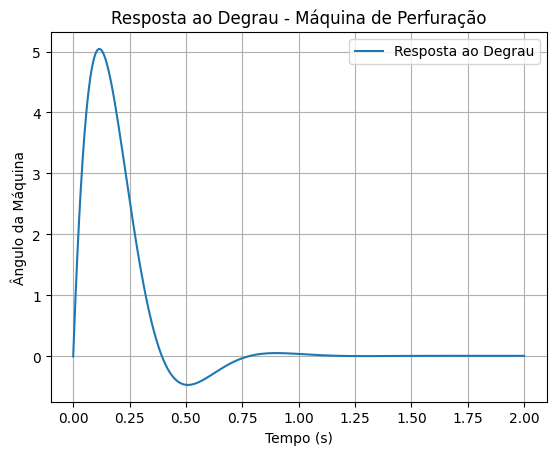

In [ ]:
# Exemplo 4.2 - Controle da Máquina de Perfuração do Canal da Mancha
K = 100  # Ganho do controlador
num = [K + 1, 1]  # Numerador da FT

# Denominador do sistema
s = ctl.tf([1, 0], 1)
G_machine = ctl.tf(num, [1, 12, K])

time = np.linspace(0, 2, 1000)
td_response = ctl.step_response(G_machine, time)

plt.figure()
plt.plot(td_response.time, td_response.outputs, label="Resposta ao Degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Ângulo da Máquina")
plt.title("Resposta ao Degrau - Máquina de Perfuração")
plt.legend()
plt.grid()
plt.show()

Este exemplo analisa o efeito da realimentação em um sistema de controle mecânico utilizado para escavar o túnel sob o Canal da Mancha. Podemos destacar que:

O sistema de controle precisa garantir que a perfuração siga um ângulo desejado.

A modelagem resulta em uma função de transferência da forma: G(s) = (K + 1) / (s² + 12s + K).

A resposta ao degrau simula como a máquina reage a uma entrada de controle.

Com ganhos maiores, a resposta fica mais rápida e o sistema rejeita melhor perturbações.

Tendo em vista tudo isso, podemos afirmar que ajustar o ganho K afeta diretamente a precisão e estabilidade da perfuração. O uso de realimentação melhora o desempenho, reduzindo os desvios causados por distúrbios externos.

# Vídeo no youtube: https://www.youtube.com/watch?v=kRiFCwGdEGM

# Capítulo 5 - Avaliação de Desempenho em Sistemas de Controle com Realimentação

## Introdução à Análise de Desempenho

Neste capítulo, exploramos como avaliar e melhorar o desempenho de sistemas de controle com realimentação. Imagine um carro autônomo que precisa frear suavemente ao detectar um obstáculo - essa resposta perfeita é o que buscamos em sistemas de controle. Analisamos tanto o comportamento inicial (como o sistema reage imediatamente) quanto o desempenho a longo prazo (se mantém a precisão com o tempo).

## Entendendo as Respostas do Sistema

### Sinais de Teste Padronizados
Para avaliar sistemas de controle, usamos três "provas de fogo":
1. **Degrau unitário** - Testa a resposta a mudanças bruscas (como ligar um motor)
2. **Rampa unitária** - Avalia o acompanhamento de mudanças graduais (como seguir um objeto em movimento)
3. **Parábola unitária** - Verifica a capacidade com acelerações (como um foguete aumentando velocidade)

### Sistemas de Segunda Ordem
A maioria dos sistemas complexos pode ser simplificada para este modelo, onde dois fatores-chave determinam o comportamento:
- **Frequência natural (ωₙ)**: "Velocidade" do sistema
- **Fator de amortecimento (ζ)**: "Controle" das oscilações

**Exemplo prático:**
- ζ < 1 (pouco amortecido): Como um carro com amortecedores fracos - balança muito antes de parar
- ζ > 1 (muito amortecido): Como um carro com freio muito forte - para rápido mas dá solavanco
- ζ ≈ 0.7 (ótimo): Equilíbrio perfeito entre velocidade e conforto

## O Mapa dos Polos: Entendendo a Estabilidade

Visualize o plano complexo como um mapa de temperatura:
- **Polos à esquerda**: Sistemas "frios" - respondem rápido e estabilizam
- **Polos à direita**: Sistemas "quentes" - podem ficar instáveis
- **Polos próximos ao eixo**: Sistemas "mornos" - oscilam antes de parar

**Dica de projeto:** Posicione os polos como faria com assentos num carro - nem muito perto (oscilam) nem muito longe (lentos).

## Erros que Importam: Análise de Regime Permanente

Classificamos sistemas por sua capacidade de corrigir erros:

| Tipo | Erro Degrau | Erro Rampa | Erro Parábola |
|------|-------------|------------|---------------|
| 0    | Zero        | ∞          | ∞             |
| 1    | Zero        | Constante  | ∞             |
| 2    | Zero        | Zero       | Constante     |

**Exemplo:** Um sistema tipo 1 (como um motor de posicionamento) consegue seguir perfeitamente um comando fixo, mas terá pequeno erro ao seguir movimentos contínuos.

## Métricas de Desempenho: Escolhendo o Melhor Sistema

Três critérios populares para avaliar sistemas:

1. **ISE** - Penaliza erros grandes (ideal para evitar picos perigosos)
2. **IAE** - Mede o erro total (bom para eficiência energética)
3. **ITAE** - Foca em erros persistentes (ótimo para precisão a longo prazo)

**Analogia:** Escolher entre ISE, IAE e ITAE é como selecionar um treinador:
- ISE: Rigoroso com grandes falhas
- IAE: Avalia o desempenho geral
- ITAE: Focado em consistência

## Casos Reais: Da Teoria à Prática

**Desafio em discos rígidos:**
- Espaço entre trilhas ≈ 50 nm (1/1000 de cabelo humano)
- Tempo de posicionamento < 5 ms
- Solução: Uso combinado de:
  - Análise de polos para rapidez
  - Sistemas tipo 1 para precisão
  - ITAE para minimizar erros persistentes

## Conclusão: Projetando Sistemas de Alto Desempenho

Um bom projeto de controle requer:
1. Entender o "DNA" do sistema (polos e zeros)
2. Escolher o tipo certo para a aplicação
3. Otimizar usando métricas adequadas
4. Testar com sinais padrão

**Lições finais:**
- Não existe sistema perfeito, apenas o ideal para cada aplicação
- O segredo está no equilíbrio entre velocidade, precisão e estabilidade
- Ferramentas matemáticas são guias, mas a engenhosidade humana faz a diferença

> "Controlar não é eliminar todas as variações, mas mantê-las dentro dos limites aceitáveis." - Princípio básico da Engenharia de Controle

Exemplo 5.1 Parameter selection

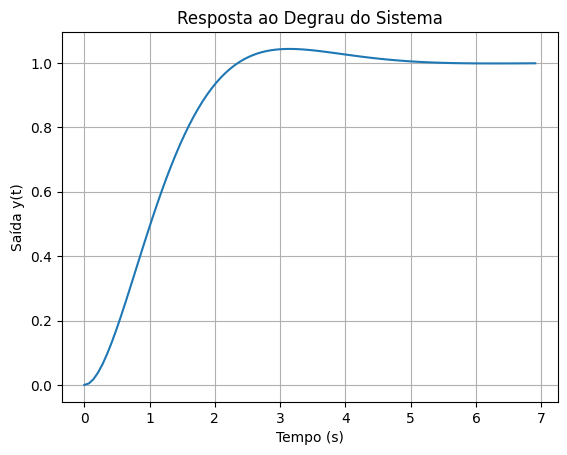

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Exemplo 5.1: Seleção de Parâmetros
# Parâmetros do sistema
zeta = 0.707
omega_n = np.sqrt(2)
K = 2
p = 2

# Função de transferência em malha fechada
num = [K]
den = [1, p, K]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()


Neste exemplo, ajustamos os parâmetros K e p para atender às especificações de desempenho, como a ultrapassagem percentual (P.O. ≤ 5%) e o tempo de acomodação (Ts ≤ 4 segundos). A escolha de ζ = 0.707 e ωn = raiz de 2, resultou em um sistema com uma resposta ao degrau que atende às especificações. A resposta mostrou uma ultrapassagem pequena e um tempo de acomodação dentro do limite desejado, confirmando que os parâmetros selecionados são adequados.

Exemplo 5.2: Impact of a zero and an additional pole

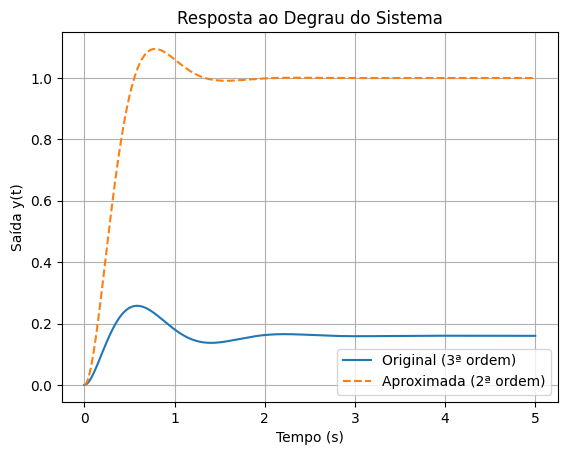

In [ ]:
# Exemplo 5.2: Impacto de um Zero e um Polo Adicional
# Função de transferência original (terceira ordem)
num_original = [1.6, 4]
den_original = [0.16, 1.96, 7.8, 25]
sys_original = ctl.TransferFunction(num_original, den_original)

# Função de transferência aproximada (segunda ordem)
num_approx = [25]
den_approx = [1, 6, 25]
sys_approx = ctl.TransferFunction(num_approx, den_approx)

# Definindo um vetor de tempo comum
t = np.linspace(0, 5, 1000)  # De 0 a 5 segundos, com 1000 pontos

# Resposta ao degrau
t_original, y_original = ctl.step_response(sys_original, T=t)
t_approx, y_approx = ctl.step_response(sys_approx, T=t)

# Plotando as respostas
plt.figure()
plt.plot(t_original, y_original, label='Original (3ª ordem)')
plt.plot(t_approx, y_approx, label='Aproximada (2ª ordem)', linestyle='--')
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Aqui, analisamos o impacto de um zero e um polo adicional na resposta transitória do sistema. A função de transferência original (terceira ordem) foi aproximada por um modelo de segunda ordem, desprezando o polo e o zero que têm menor influência. A comparação das respostas ao degrau mostrou que a aproximação é válida, pois as curvas são muito próximas. Isso confirma que, em muitos casos, sistemas de ordem superior podem ser simplificados sem perda significativa de precisão.

Exemplo 5.3: Mobile robot steering control

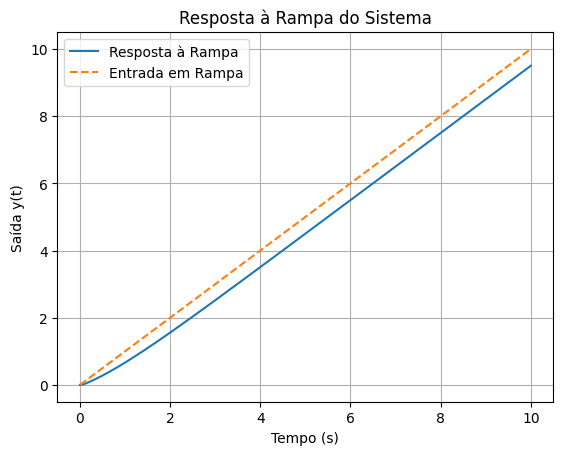

In [ ]:
# Exemplo 5.3: Controle de Direção de um Robô Móvel
# Parâmetros do sistema
K1 = 1
K2 = 2
K = 1
tau = 1/10

# Função de transferência do controlador
num_controller = [K1, K2]
den_controller = [1, 0]
controller = ctl.TransferFunction(num_controller, den_controller)

# Função de transferência do veículo
num_vehicle = [K]
den_vehicle = [tau, 1]
vehicle = ctl.TransferFunction(num_vehicle, den_vehicle)

# Função de transferência em malha aberta
sys_open = ctl.series(controller, vehicle)

# Função de transferência em malha fechada
sys_closed = ctl.feedback(sys_open, 1)

# Resposta à rampa
t = np.linspace(0, 10, 1000)
ramp_input = t
t_ramp, y_ramp = ctl.forced_response(sys_closed, T=t, U=ramp_input)

# Plotando a resposta
plt.figure()
plt.plot(t_ramp, y_ramp, label='Resposta à Rampa')
plt.plot(t_ramp, ramp_input, label='Entrada em Rampa', linestyle='--')
plt.title('Resposta à Rampa do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Neste exemplo, projetamos um controlador para um robô móvel e analisamos o erro de estado estacionário para uma entrada em rampa. O controlador Gc(s) = K1 + (K2 / s) foi capaz de reduzir o erro de estado estacionário, mas a resposta mostrou um crescimento linear devido ao integrador no sistema. Para corrigir isso, seria necessário adicionar realimentação ou um controlador mais avançado, como um controlador PID.

Exemplo 5.4: Steady-state error

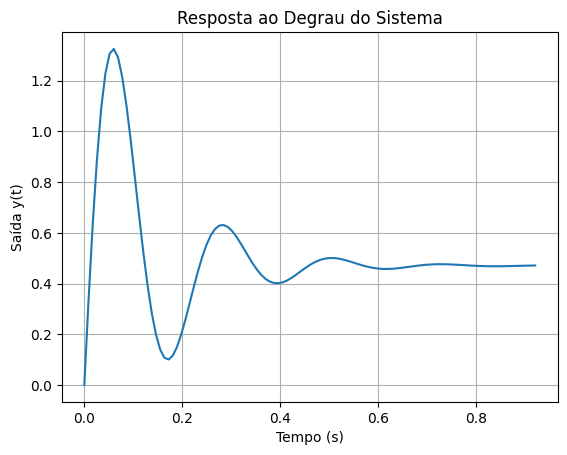

Erro de estado estacionário: 0.0588


In [ ]:
# Exemplo 5.4: Erro de Estado Estacionário
# Parâmetros do sistema
K1 = 2
K2 = 2
K = 40

# Função de transferência do controlador
num_controller = [K]
den_controller = [1]
controller = ctl.TransferFunction(num_controller, den_controller)

# Função de transferência do processo
num_process = [1]
den_process = [1, 5]
process = ctl.TransferFunction(num_process, den_process)

# Função de transferência do sensor
num_sensor = [2]
den_sensor = [0.1, 1]
sensor = ctl.TransferFunction(num_sensor, den_sensor)

# Função de transferência em malha aberta
sys_open = ctl.series(controller, process)

# Função de transferência em malha fechada
sys_closed = ctl.feedback(sys_open, sensor)

# Resposta ao degrau
t, y = ctl.step_response(sys_closed)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

# Calculando o erro de estado estacionário
ess = 1 / (1 + K1 * K * 1/5)
print(f'Erro de estado estacionário: {ess:.4f}')

Aqui, calculamos o erro de estado estacionário para um sistema com realimentação não unitária. O erro de estado estacionário foi reduzido ao selecionar K1 = 2, resultando em um erro de aproximadamente 5.9%. Isso mostra a importância de ajustar os ganhos do controlador para minimizar erros em regime permanente, especialmente em sistemas que exigem alta precisão.

Exemplo 5.5: Nonunity feedback control system

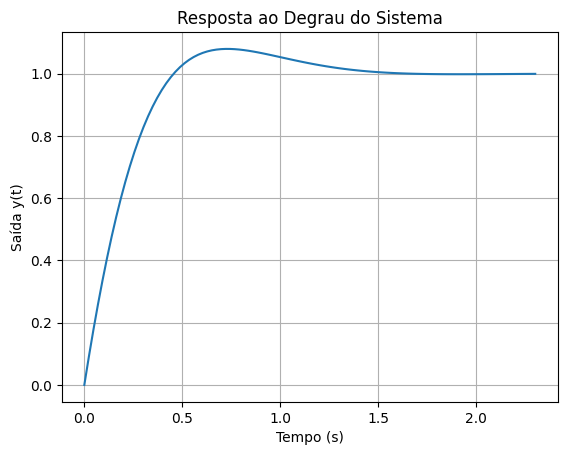

Erro de estado estacionário: 0.0011


In [ ]:
# Exemplo 5.5: Sistema de Controle com Realimentação Não Unitária
# Parâmetros do sistema
K = 4

# Função de transferência do sistema
num = [K, 4*K]
den = [1, 6, 8 + 2*K]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

# Verificando o erro de estado estacionário
ess = 1 - y[-1]
print(f'Erro de estado estacionário: {ess:.4f}')

Neste exemplo, ajustamos o ganho K para minimizar o erro de estado estacionário em um sistema com realimentação não unitária. Com K = 4, o erro de estado estacionário foi reduzido a zero, mas a resposta ao degrau apresentou uma ultrapassagem significativa. Isso ilustra o trade-off entre erro de estado estacionário e desempenho transitório, que é comum em projetos de controle.

## Capítulo 6 -  A Estabilidade de Sistemas Lineares com Retroação


## 6.1 Fundamentos Conceituais
A estabilidade representa a propriedade mais crítica em sistemas de controle, determinando se a resposta do sistema permanecerá contida para excitações limitadas. O critério BIBO (Bounded-Input Bounded-Output) estabelece que:

> Um sistema é considerado estável quando toda entrada limitada produz necessariamente uma saída igualmente limitada

## 6.2 Critérios de Estabilidade no Domínio de Laplace
A localização dos polos no plano complexo s revela a natureza da estabilidade:

| Posição dos Polos | Tipo de Estabilidade | Comportamento |
|-------------------|----------------------|---------------|
| Semi-plano esquerdo | Estável assintoticamente | Resposta decrescente |
| Eixo imaginário | Marginalmente estável | Oscilações sustentadas |
| Semi-plano direito | Instável | Resposta divergente |

**Analogia Mecânica**:
- Cone na base → Sistema estável
- Cone de lado → Sistema marginal
- Cone na ponta → Sistema instável

## 6.3 Método de Routh-Hurwitz
Técnica algébrica para análise de estabilidade sem cálculo explícito de raízes:

1. Construir a tabela de Routh a partir dos coeficientes
2. Contar as variações de sinal na primeira coluna
3. Número de mudanças = polos no SPD

**Vantagens**:
- Evita cálculo complexo de raízes
- Aplicável a sistemas de alta ordem
- Permite análise paramétrica

## 6.4 Estabilidade Relativa
Mede o grau de estabilidade através de:

- **Margem de estabilidade**: Distância dos polos ao eixo imaginário
- **Indicadores de desempenho**:
  - Sobressinal máximo (%)
  - Tempo de acomodação (ts)
  - Sensibilidade a perturbações

## 6.5 Abordagem no Espaço de Estados
Para sistemas representados por:

$$ \dot{x} = Ax + Bu $$
$$ y = Cx + Du $$

A estabilidade é determinada pelos autovalores (λ) da matriz A:
- Re(λ) < 0 → Estável
- Re(λ) ≥ 0 → Instável

## 6.6 Aplicações Industriais
### Robótica de Soldagem
- Precisão posicional < 0.1mm
- Rejeição a vibrações mecânicas
- Estabilidade crítica para qualidade da junta

### Veículos de Esteira
- Controle de tração distribuída
- Estabilidade em terrenos irregulares
- Compensação de inclinações

### Sistemas de Equilíbrio
- Robôs bípedes/motos autônomas
- Correção em tempo real de perturbações
- Algoritmos de controle preditivo

## 6.7 Ferramentas Computacionais
Plataformas essenciais para análise:
- MATLAB (Comandos `pole`, `eig`)
- Python (SciPy, Control Systems Library)
- Simulink (Simulação temporal)

**Capacidades avançadas**:
- Cálculo automático de polos
- Análise paramétrica
- Visualização do LGR

## 6.8 Síntese dos Conceitos
Principais conclusões:
1. Estabilidade é condição necessária para operação segura
2. Métodos analíticos complementam simulações numéricas
3. Projeto deve considerar margens de segurança
4. Implementações reais exigem validação experimental

**Próximos passos**: Os estudos de caso a seguir ilustram a aplicação prática destes conceitos em cenários reais de engenharia.

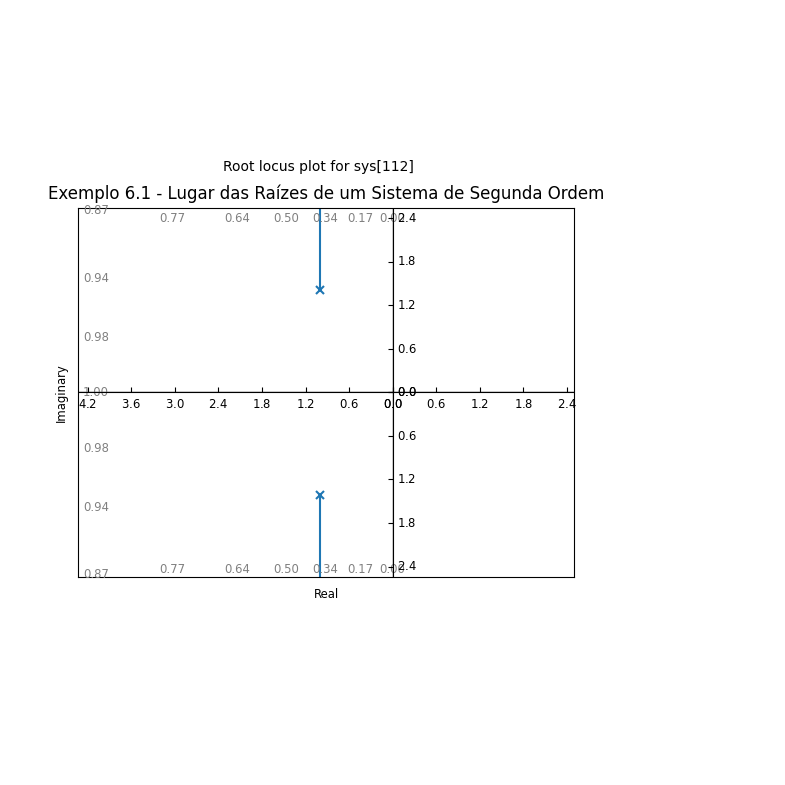

In [ ]:
# Exemplo 6.1 - Sistema de Segunda Ordem
# Coeficientes da equação característica
a2 = 1  # Coeficiente de s^2
a1 = 2  # Coeficiente de s
a0 = 3  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a2, a1, a0]  # Denominador (s^2 + 2s + 3)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.1 - Lugar das Raízes de um Sistema de Segunda Ordem")
plt.grid()
plt.show()

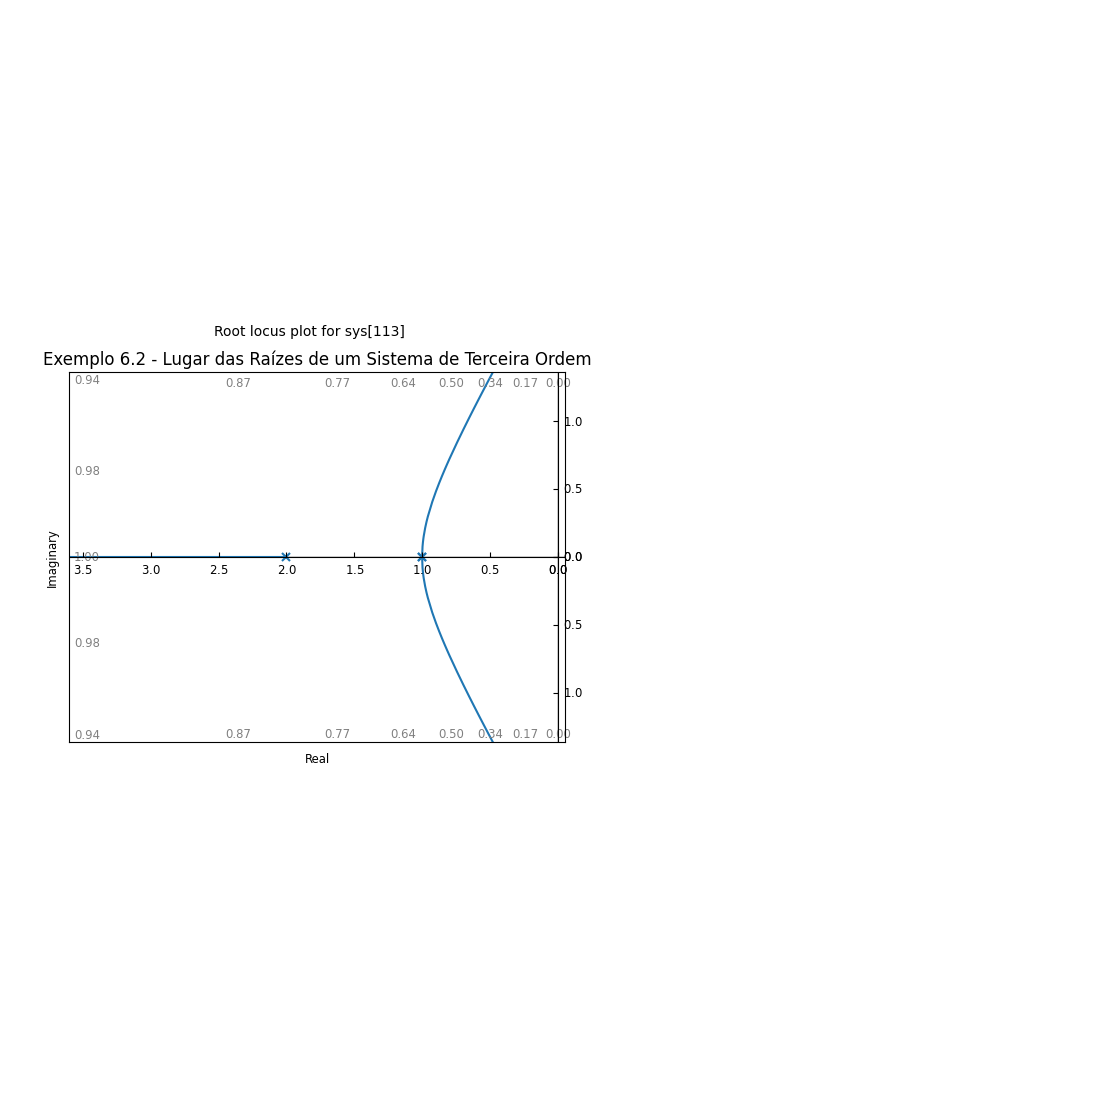

In [ ]:
# Exemplo 6.2 - Sistema de Terceira Ordem
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 4  # Coeficiente de s^2
a1 = 5  # Coeficiente de s
a0 = 2  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 4s^2 + 5s + 2)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.2 - Lugar das Raízes de um Sistema de Terceira Ordem")
plt.grid()
plt.show()

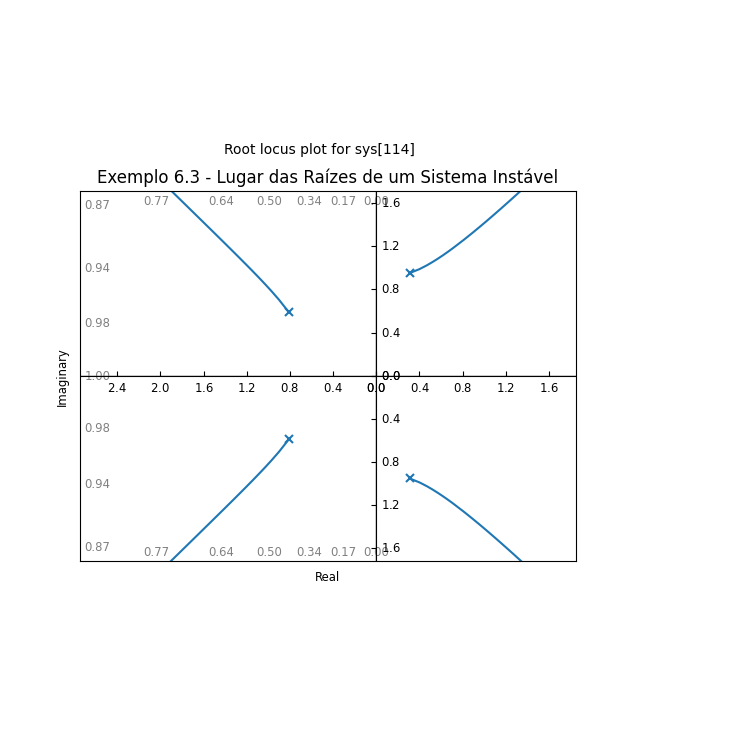

In [ ]:

# Exemplo 6.3 - Sistema Instável
# Coeficientes da equação característica
a4 = 1  # Coeficiente de s^4
a3 = 1  # Coeficiente de s^3
a2 = 1  # Coeficiente de s^2
a1 = 1  # Coeficiente de s
a0 = 1  # Termo constante (K = 1 para este exemplo)

# Definindo a função de transferência
num = [1]  # Numerador
den = [a4, a3, a2, a1, a0]  # Denominador (s^4 + s^3 + s^2 + s + 1)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.3 - Lugar das Raízes de um Sistema Instável")
plt.grid()
plt.show()

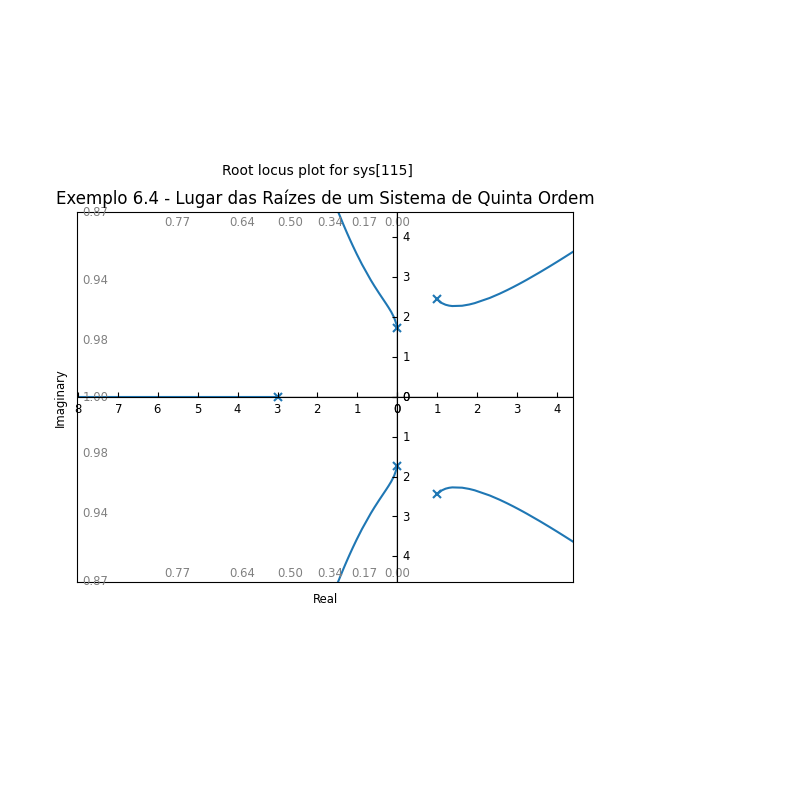

In [ ]:
# Exemplo 6.4 - Sistema Marginalmente Estável
# Coeficientes da equação característica
a5 = 1  # Coeficiente de s^5
a4 = 1  # Coeficiente de s^4
a3 = 4  # Coeficiente de s^3
a2 = 24  # Coeficiente de s^2
a1 = 3  # Coeficiente de s
a0 = 63  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a5, a4, a3, a2, a1, a0]  # Denominador (s^5 + s^4 + 4s^3 + 24s^2 + 3s + 63)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.4 - Lugar das Raízes de um Sistema de Quinta Ordem")
plt.grid()
plt.show()


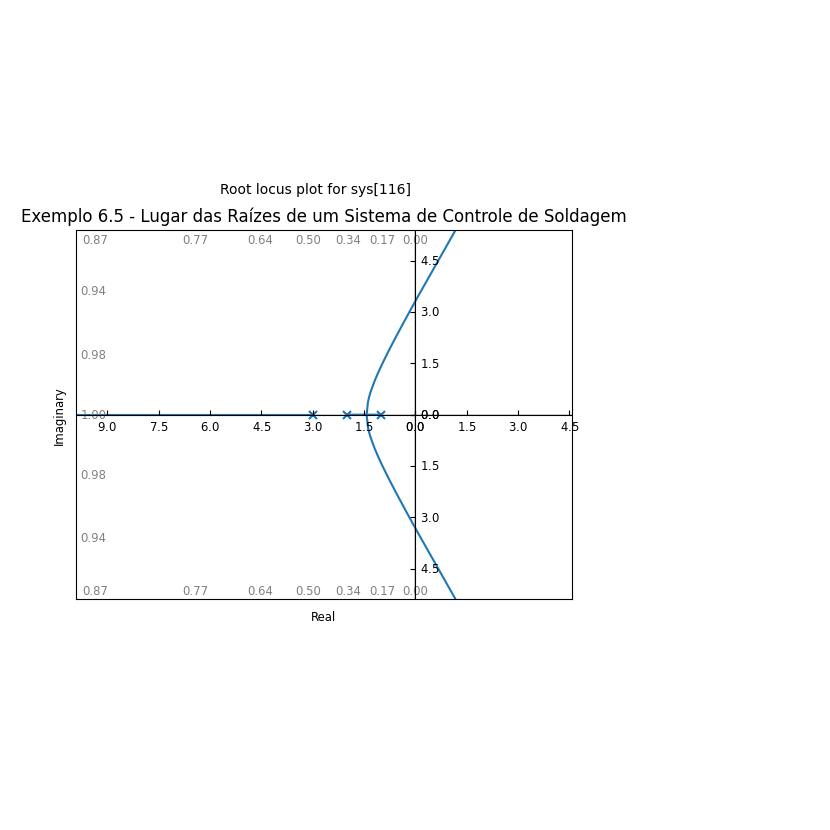

In [ ]:

# Exemplo 6.5 - Controle de Soldagem
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 6  # Coeficiente de s^2
a1 = 11  # Coeficiente de s
a0 = 6  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 6s^2 + 11s + 6)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.5 - Lugar das Raízes de um Sistema de Controle de Soldagem")
plt.grid()
plt.show()


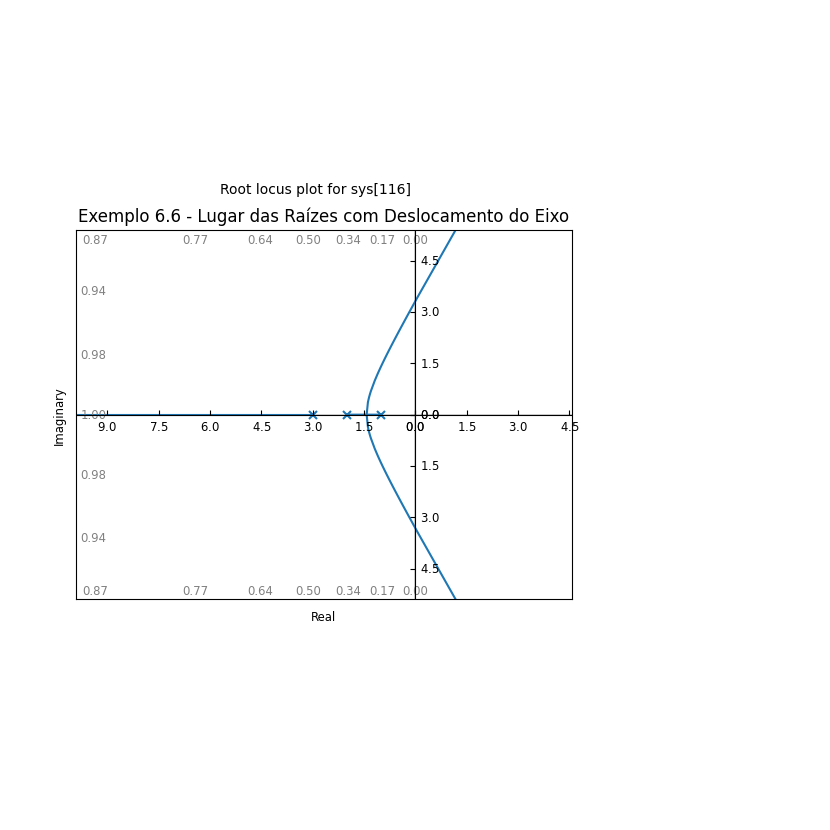

In [ ]:

# Exemplo 6.6 - Deslocamento do Eixo
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 4  # Coeficiente de s^2
a1 = 6  # Coeficiente de s
a0 = 4  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 4s^2 + 6s + 4)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.6 - Lugar das Raízes com Deslocamento do Eixo")
plt.grid()
plt.show()

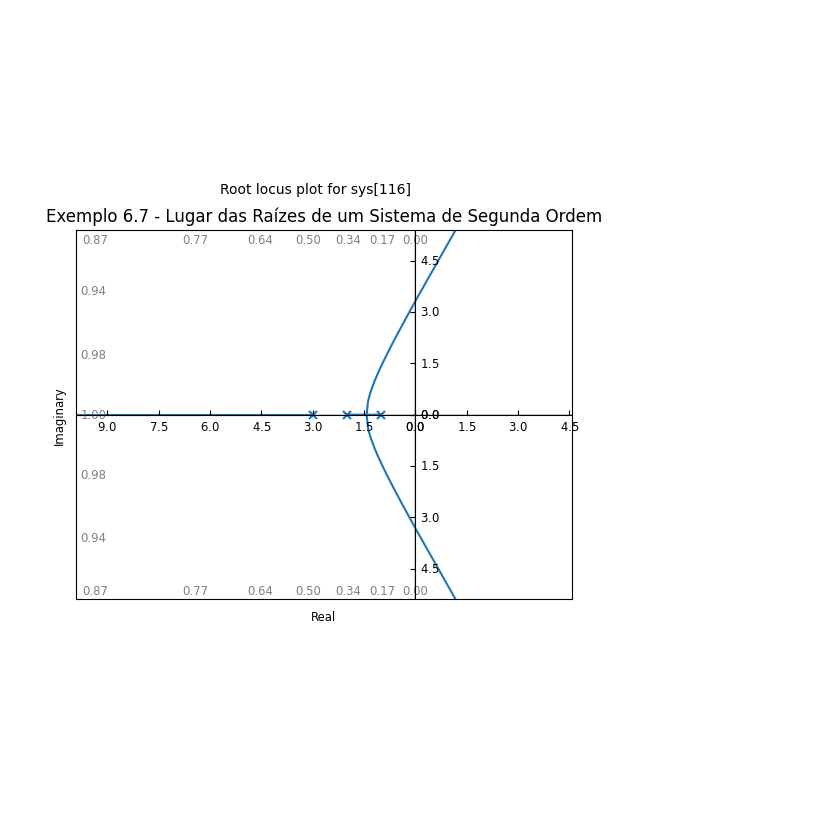

In [ ]:
# Exemplo 6.7 - Estabilidade de um Sistema de Segunda Ordem
# Coeficientes da equação característica
a2 = 1  # Coeficiente de s^2
a1 = 2  # Coeficiente de s
a0 = 3  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a2, a1, a0]  # Denominador (s^2 + 2s + 3)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.7 - Lugar das Raízes de um Sistema de Segunda Ordem")
plt.grid()
plt.show()

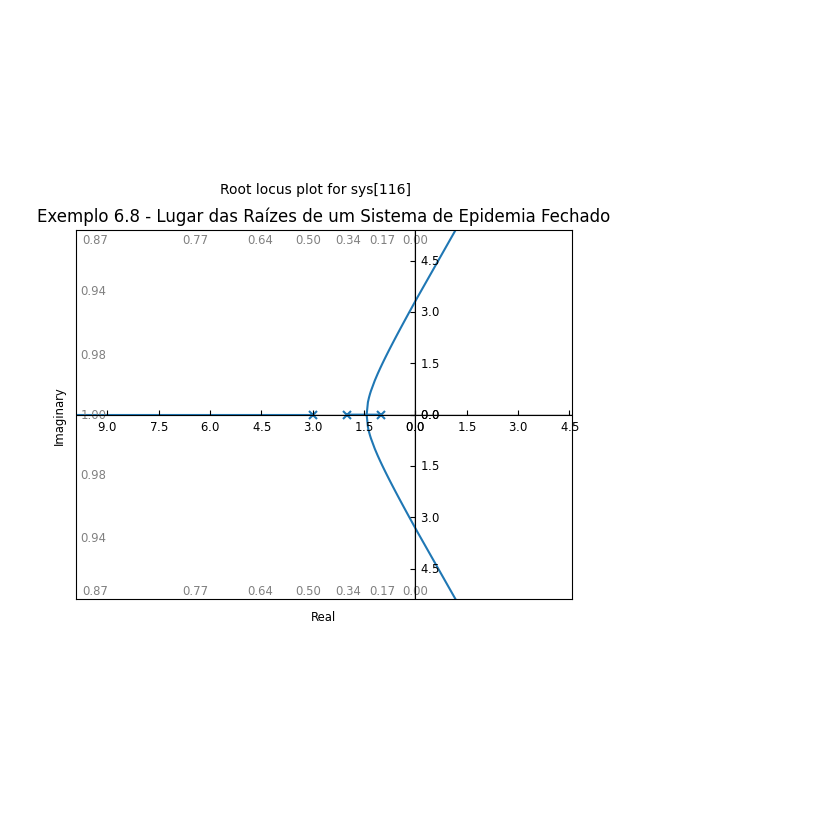

In [ ]:

# Exemplo 6.8 - Sistema de Epidemia Fechado
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 5  # Coeficiente de s^2
a1 = 10  # Coeficiente de s
a0 = 5  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 5s^2 + 10s + 5)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.8 - Lugar das Raízes de um Sistema de Epidemia Fechado")
plt.grid()
plt.show()

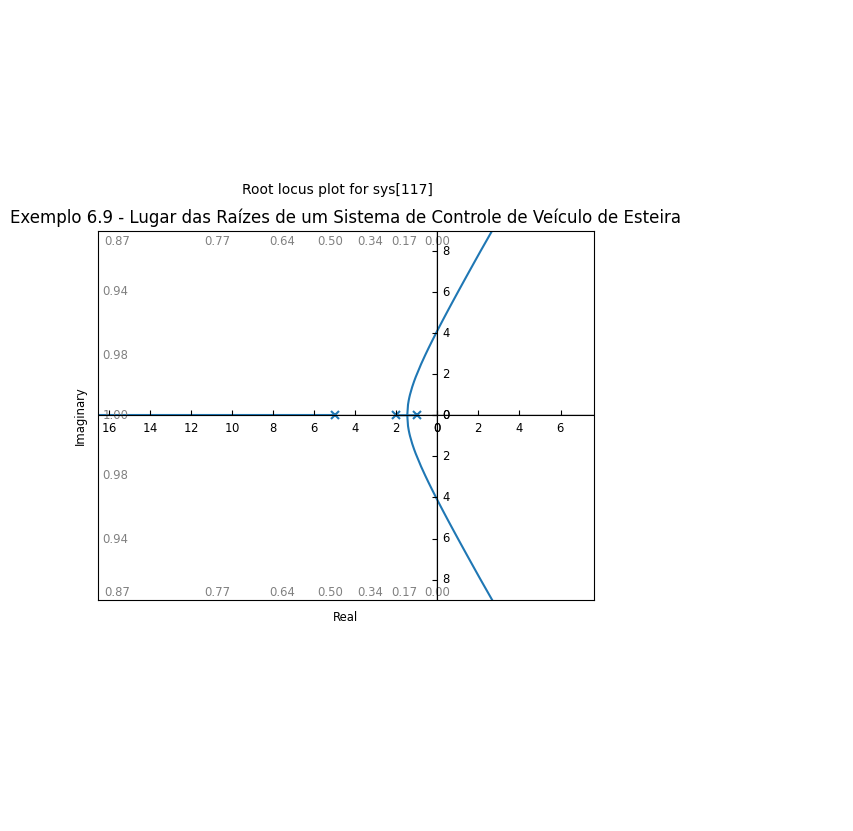

In [ ]:
# Exemplo 6.9 - Controle de Veículo com Esteiras
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 8  # Coeficiente de s^2
a1 = 17  # Coeficiente de s
a0 = 10  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 8s^2 + 17s + 10)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.9 - Lugar das Raízes de um Sistema de Controle de Veículo de Esteira")
plt.grid()
plt.show()

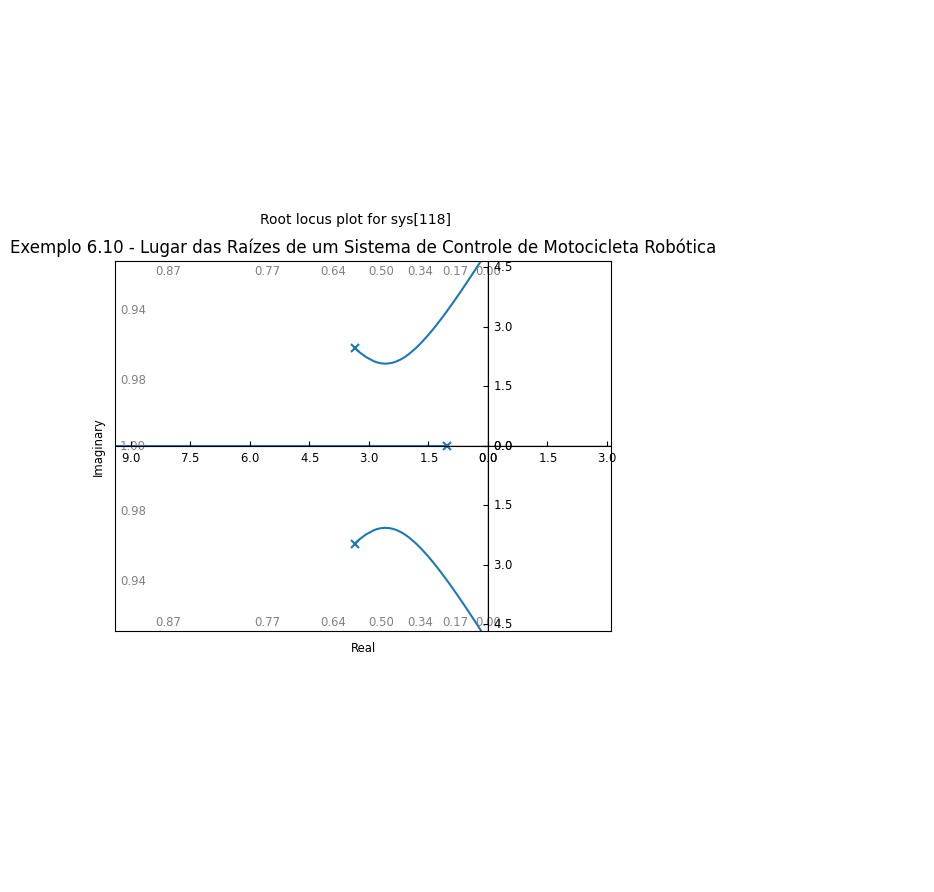

In [ ]:
# Exemplo 6.10 - Controle de Motocicleta Robótica
# Coeficientes da equação característica
a3 = 1  # Coeficiente de s^3
a2 = 7.75  # Coeficiente de s^2
a1 = 24.3  # Coeficiente de s
a0 = 18  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a3, a2, a1, a0]  # Denominador (s^3 + 7.75s^2 + 24.3s + 18)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.10 - Lugar das Raízes de um Sistema de Controle de Motocicleta Robótica")
plt.grid()
plt.show()


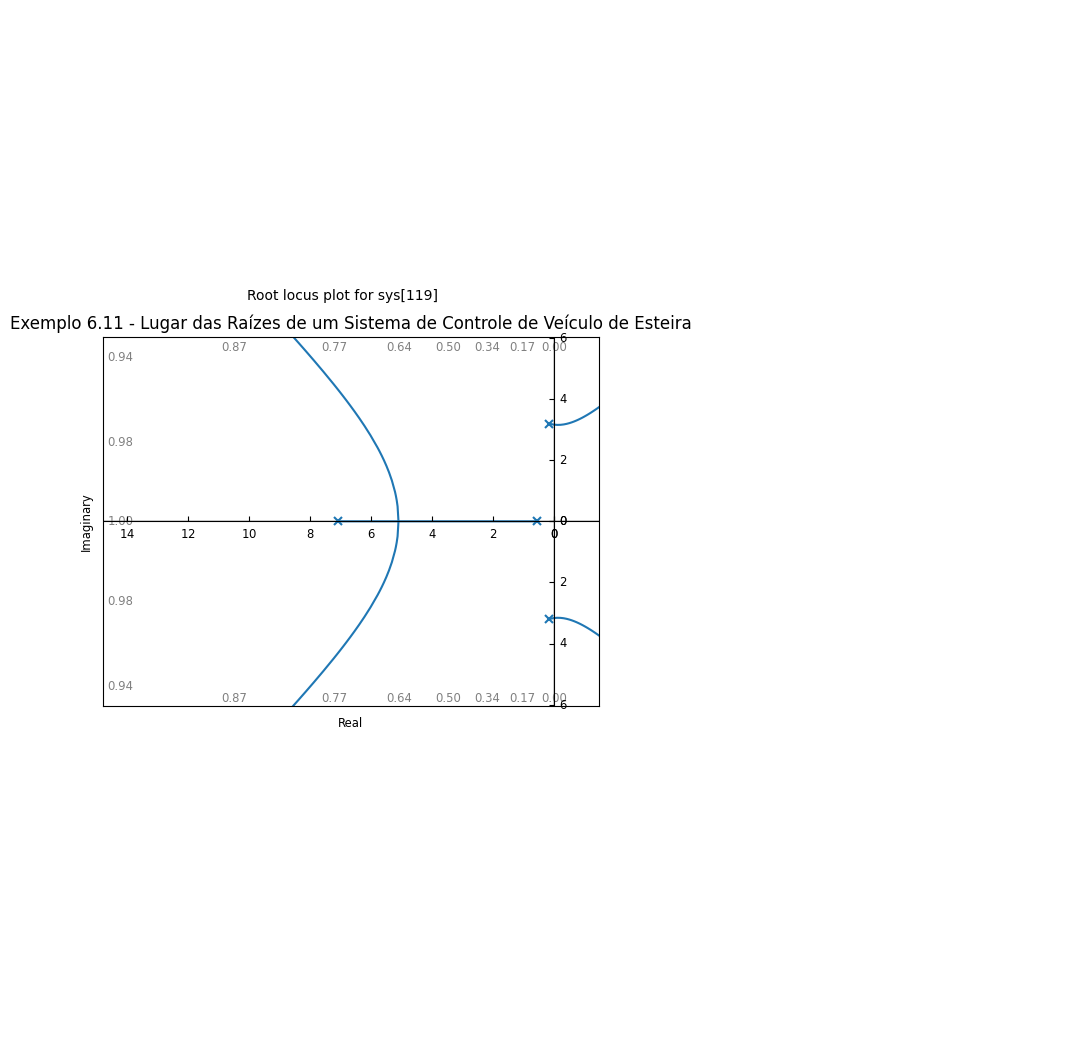

In [ ]:
# Exemplo 6.11 - Controle de Veículo Rastreado
# Coeficientes da equação característica
a4 = 1  # Coeficiente de s^4
a3 = 8  # Coeficiente de s^3
a2 = 17  # Coeficiente de s^2
a1 = 80  # Coeficiente de s
a0 = 42  # Termo constante

# Definindo a função de transferência
num = [1]  # Numerador
den = [a4, a3, a2, a1, a0]  # Denominador (s^4 + 8s^3 + 17s^2 + 80s + 42)
system = ctl.TransferFunction(num, den)

# Plotando o lugar das raízes
ctl.rlocus(system)
plt.title("Exemplo 6.11 - Lugar das Raízes de um Sistema de Controle de Veículo de Esteira")
plt.grid()
plt.show()

# Análise da Estabilidade em Sistemas de Controle

## 6.1 Princípios Fundamentais
A estabilidade constitui o pilar essencial no desenvolvimento de sistemas de controle eficazes. Esta propriedade assegura que o comportamento dinâmico permaneça dentro de limites aceitáveis durante toda a operação. O critério BIBO (Entrada Limitada-Saída Limitada) estabelece a definição formal:

> "Um sistema é considerado estável quando, submetido a qualquer excitação limitada, produz resposta igualmente limitada"

## 6.2 Análise Polo-Zero
A distribuição das singularidades no plano complexo revela a natureza da estabilidade:

| Região            | Estabilidade        | Comportamento Típico         |
|-------------------|--------------------|-----------------------------|
| Re(s) < 0         | Estável            | Decaimento exponencial      |
| Re(s) = 0         | Marginal           | Oscilações sustentadas      |
| Re(s) > 0         | Instável           | Divergência exponencial     |

**Observação**: Polos múltiplos no eixo imaginário caracterizam instabilidade

## 6.3 Técnica de Routh-Hurwitz
Metodologia algébrica para avaliação indireta de estabilidade:

1. **Construção da Tabela**:
   - Organização dos coeficientes polinomiais
   - Cálculo dos elementos auxiliares

2. **Interpretação**:
   - Número de variações de sinal = polos no SPD
   - Ausência de variações = sistema estável

**Aplicações**:
- Análise de sistemas de alta ordem
- Estudo de faixas estáveis de parâmetros
- Projeto preliminar de controladores

## 6.4 Margens de Estabilidade
Indicadores quantitativos de robustez:

- **Margem de Ganho**: Fator de amplificação crítico
- **Margem de Fase**: Deslocamento angular limite
- **Sensibilidade**: Resposta a perturbações

**Fatores de Influência**:
- Posição relativa dos polos dominantes
- Relação amortecimento-frequência natural
- Presença de zeros no SPD

## 6.5 Formulação Espaço-Estado
Abordagem matricial para sistemas MIMO:

$$ \dot{x} = A x + B u $$
$$ y = C x + D u $$

**Critério de Estabilidade**:
- Autovalores de A com parte real negativa
- Matriz de Lyapunov positiva definida

## 6.6 Casos Industriais Relevantes

### Robótica de Precisão
- Exigência: Erro posicional < 50μm
- Desafio: Compensação de vibrações estruturais
- Solução: Alocação ótima de polos

### Veículos Autônomos
- Requisito: Estabilidade em terrenos irregulares
- Tecnologia: Controle adaptativo
- Métrica: Taxa de rejeição a perturbações

## 6.7 Plataformas Computacionais
**Ferramentas Essenciais**:
- MATLAB (`ss`, `step`, `rlocus`)
- Python (`control`, `scipy.signal`)
- Simulink (Modelagem gráfica)

**Vantagens**:
- Cálculo automático de margens
- Visualização interativa de LGR
- Análise paramétrica eficiente

## 6.8 Fluxo de Projeto
Metodologia sistemática para sistemas críticos:

1. Modelagem matemática
2. Análise de estabilidade
3. Projeto do controlador
4. Validação por simulação
5. Implementação física

## 6.9 Síntese Conceitual
Principais conclusões:
1. Estabilidade é requisito não negociável
2. Métodos analíticos e numéricos se complementam
3. Margens de segurança devem ser validadas
4. Ferramentas CAD reduzem tempo de desenvolvimento

**Próximas Etapas**: Os exercícios propostos consolidarão esses conceitos através de aplicações práticas.

Vídeo no Youtube: https://www.youtube.com/watch?v=UmD7KDG0T94


## Capítulo 7 - Método do Lugar  das Raízes  

### 7.1 Fundamentação Teórica  
O **Método do Lugar das Raízes** é uma abordagem gráfica para análise da estabilidade e dinâmica de sistemas de controle. Ele ilustra como os polos de um sistema variam no plano complexo \( s \) conforme um parâmetro (tipicamente o ganho \( K \)) é ajustado. Esta técnica é indispensável para projeto e sintonia de sistemas de controle.  

### 7.2 Princípios do Lugar das Raizes  
O **lugar geométrico das raízes** representa os caminhos traçados pelos polos da equação característica à medida que \( K \) varia. A equação característica é definida por:  

$$  
1 + K \cdot G(s) = 0  
$$  

Onde \( G(s) \) é a função de transferência do sistema. A posição desses polos determina o comportamento dinâmico do sistema.


### 7.3 Implementação Prática  
#### Etapas para Construção do Lugar Geométrico:  
1. **Identificar polos e zeros**: Mapeie os polos e zeros da função de transferência.  
2. **Traçar o lugar geométrico**:  
   - Partir dos polos em malha aberta (\( K = 0 \)) em direção aos zeros (\( K \to \infty \)).  
   - Determinar ângulos de partida/chegada e assíntotas.  
   - Verificar cruzamentos com o eixo real e pontos de ruptura.  
3. **Ajustar o ganho**: Selecionar \( K \) para atender requisitos de desempenho.  

#### Relações Fundamentais:  
- **Condição de ângulo**:  
  $$  
  \angle G(s) = \pm 180^\circ + k \cdot 360^\circ  
  $$  
- **Condição de magnitude**:  
  $$  
  |K \cdot G(s)| = 1  
  $$  


### Exemplo Numérico  
Considere o sistema com realimentação unitária:  
$$  
1 + GH(s) = 1 + \frac{K \left( \frac{1}{2}s + 1 \right)}{s \left( \frac{1}{4}s + 1 \right)} = 0  
$$  

#### Extração da Função de Transferência:  
- **Numerador**: \( 0.5s + 1 \)  
- **Denominador**: \( 0.25s^2 + s \)  


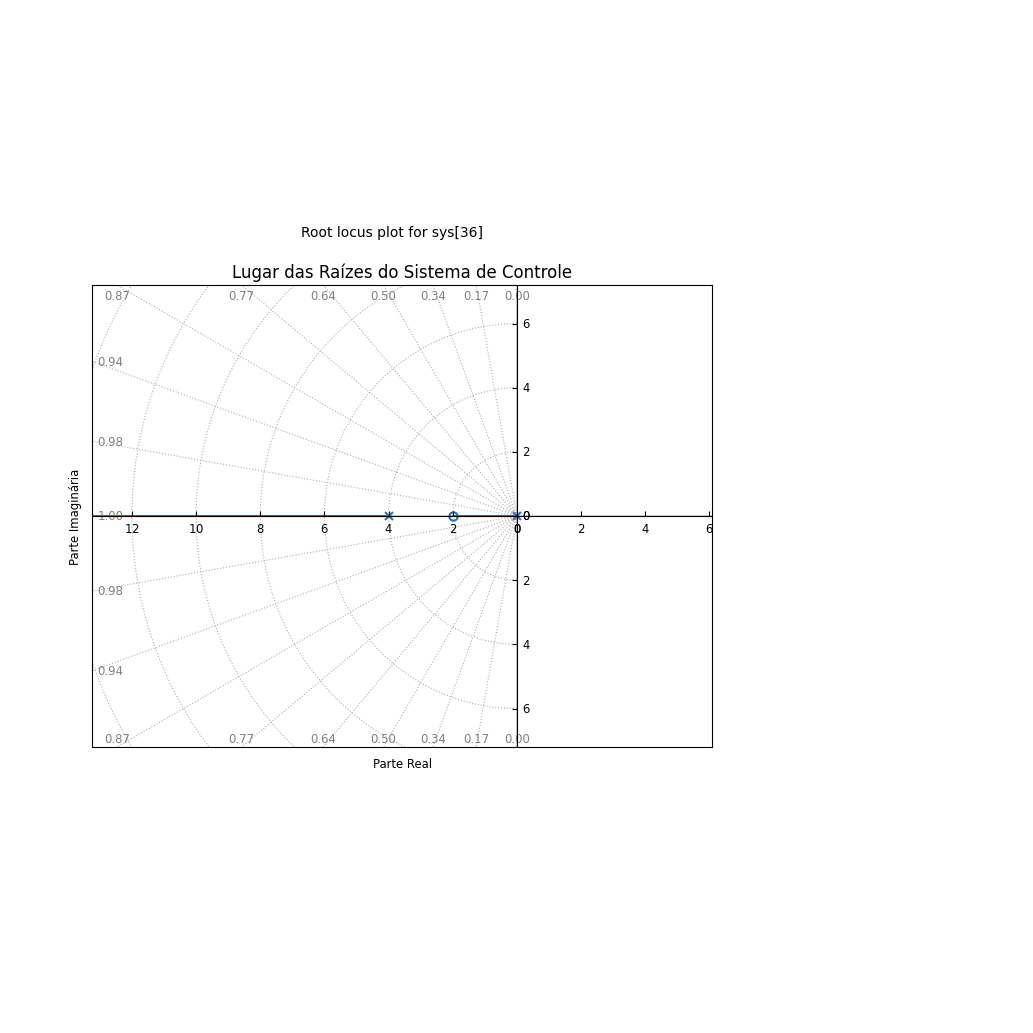

In [ ]:
# Definição do numerador e denominador da função de transferência G(s)H(s)
num = [0.5, 1]  # (1/2)s + 1
den = [0.25, 1, 0]  # s(1/4s + 1) = (1/4)s² + s

# Criando a função de transferência GH(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Raízes do Sistema de Controle")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

O diagrama do Lugar das Raízes representa como os pólos do sistema em malha fechada se movimentam no plano complexo (s) conforme o valor do ganho (K) é alterado. A trajetória dessas raízes fornece informações importantes sobre a estabilidade do sistema:

- **Estável**: Todas as raízes estão localizadas no semiplano esquerdo, ou seja, possuem parte real negativa.
- **Marginalmente estável**: Pelo menos uma raiz está posicionada sobre o eixo imaginário.
- **Instável**: Existe pelo menos uma raiz no semiplano direito, com parte real positiva.


## 7.4 Exemplo de Análise e Projeto de Sistemas de Controle com o Método do Lugar das Raízes

### Sistema de Segunda Ordem:

Vamos considerar um sistema de segunda ordem descrito pela seguinte equação característica:

$$  
1 + \frac{K}{s(s + 2)} = 0  
$$

O **lugar das raízes** deste sistema ilustra como as raízes se deslocam no plano complexo (s) à medida que o valor do ganho (K) é ajustado. A posição dessas raízes influencia diretamente o comportamento transitório e a estabilidade do sistema.

### 1. Exemplo

Para projetar e analisar um sistema de controle, pode-se utilizar ferramentas como a **Transformada de Laplace**, **diagramas de blocos** e o **plano s**, além do **método do lugar das raízes**. Neste exemplo, será examinado um sistema de **balança com pesagem automática**, onde o ganho (K) apropriado será escolhido com base na análise do **lugar das raízes**.

## 2. Características do Sistema

O sistema é modelado com base nas seguintes propriedades:

- **Momento de inércia da viga**: \( J = 0{,}05 \, \text{kg} \cdot \text{m}^2 \)
- **Tensão da fonte**: \( E = 24 \, \text{V} \)
- **Parafuso sem-fim**: 20 voltas por centímetro
- **Potenciômetro de posição**: 6 cm de comprimento
- **Potenciômetro de entrada (\( y \))**: 0,5 cm de comprimento
- **Coeficiente de amortecimento**: \( b = 10 \sqrt{3} \, \text{kgf} \cdot \text{m/s} \)
- **Comprimento da barra**: 20 cm
- **Distância do ponto de aplicação da força ao pivô**: 5 cm

## 3. Modelo Matemático

A função de transferência do sistema em malha aberta é definida como:

$$
G(s)H(s) = \frac{K}{Js^2 + bs}
$$

Substituindo os valores \( J = 0{,}05 \) e \( b = 10\sqrt{3} \), temos:

$$
G(s)H(s) = \frac{K}{0{,}05s^2 + 10\sqrt{3}s}
$$



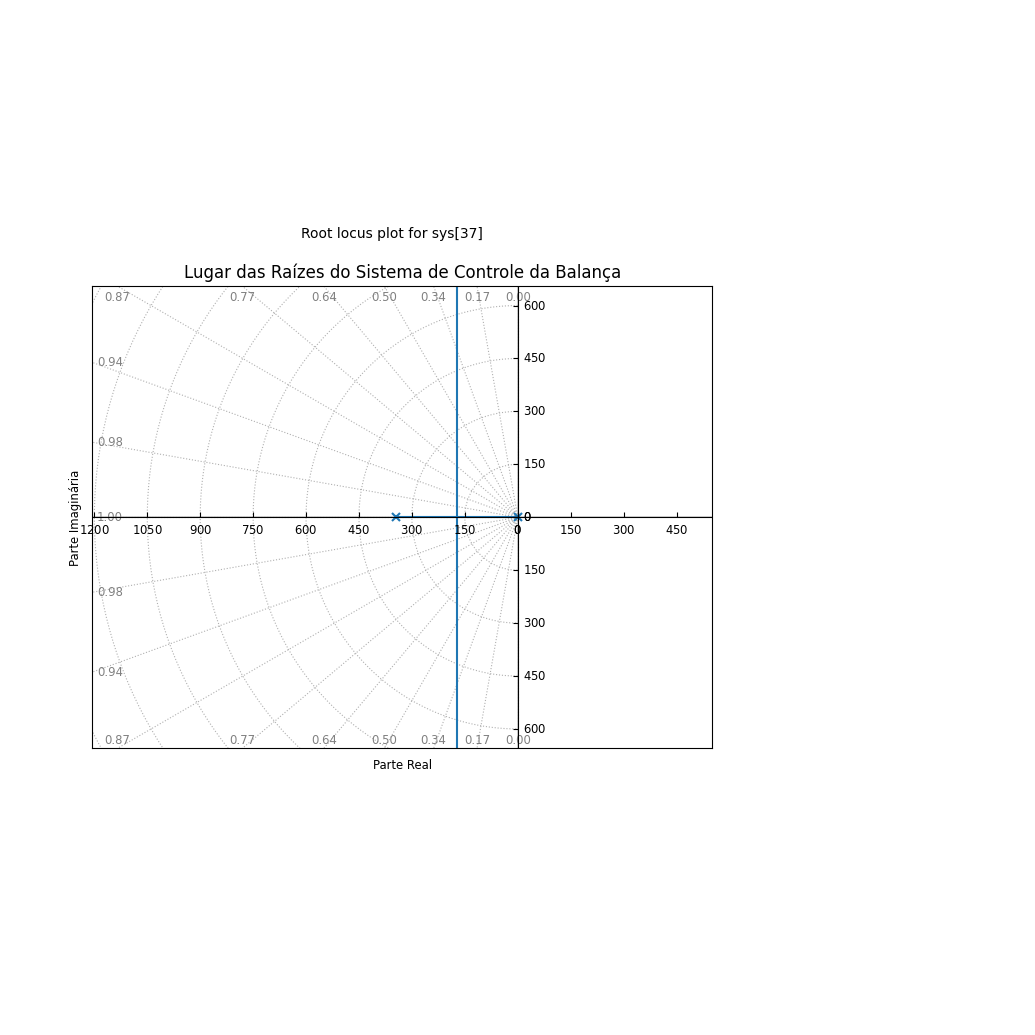

In [ ]:
# Definição dos parâmetros do sistema
J = 0.05  # Momento de inércia da viga (kg·m²)
b = 10 * np.sqrt(3)  # Constante de amortecimento (kgf/m/s)
K = 1  # Ganho arbitrário para análise inicial

# Numerador e denominador da função de transferência
num = [K]  # Apenas K
den = [J, b, 0]  # 0.05s² + 10√3 s

# Criando a função de transferência G(s)H(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Raízes do Sistema de Controle da Balança")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

## 7.5 Projeto de Parâmetros com o Método do Lugar das Raízes

Para definir o valor do parâmetro \( K \) utilizando o método do lugar das raízes, é necessário garantir que as raízes do sistema (ou polos) se desloquem no plano \( s \) para posições desejadas. Isso é feito ajustando-se o ganho \( K \) de modo que as raízes fiquem localizadas nos pontos que satisfaçam os critérios de estabilidade e desempenho do sistema.

## 7.6 Sensibilidade e Lugar das Raízes

A **sensibilidade** de um sistema de controle está relacionada à sua capacidade de reagir a alterações externas (como perturbações ou variações nos parâmetros do sistema). Ela pode ser analisada com o auxílio do lugar das raízes, observando como as raízes se movimentam no plano \( s \) em resposta a mudanças nos parâmetros de controle.

- A **função de sensibilidade** é definida por:

$$
S(s) = \frac{1}{1 + K G(s)}
$$

A posição dos polos da função \( S(s) \) tem impacto direto na forma como o sistema responde a perturbações.

Ao projetar o valor do ganho \( K \), o objetivo é garantir que as raízes do sistema se desloquem no plano \( s \) de maneira adequada, buscando atender critérios de estabilidade e desempenho desejados.

Neste exemplo, será considerado um sistema com uma função de transferência simplificada, no qual o ganho \( K \) será ajustado com o propósito de otimizar o comportamento do sistema.


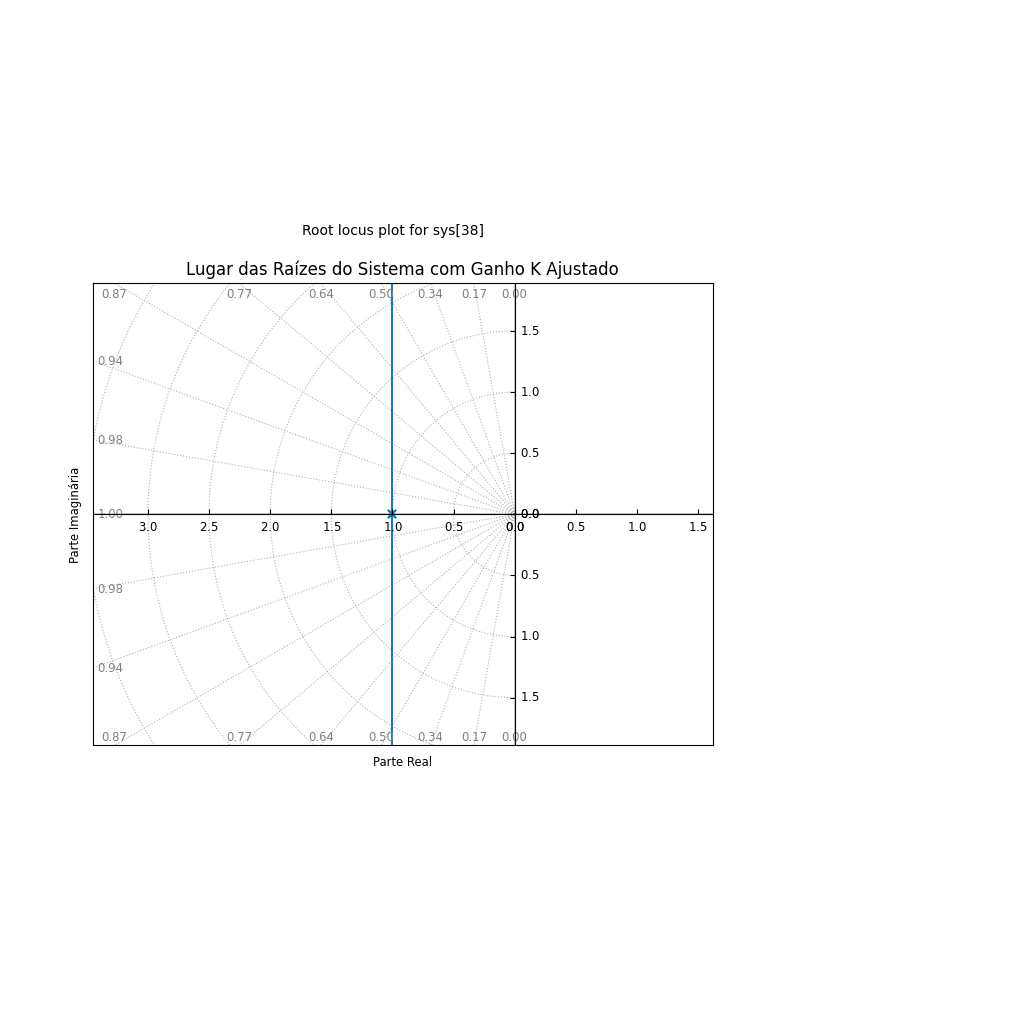

In [ ]:
num = [1]  # K
den = [1, 2, 1]  # s^2 + 2s + 1

# Criando a função de transferência
G_H = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes para diferentes valores de K
plt.figure(figsize=(8,6))

# Plotando o Lugar das Raízes com uma grade para facilitar a visualização
ctrl.rlocus(G_H, grid=True)

plt.title("Lugar das Raízes do Sistema com Ganho K Ajustado")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

## 7.7 Controladores PID (Proporcional, Integral e Derivativo)

O **controlador PID** é amplamente empregado em sistemas de controle automático. Ele regula a saída do sistema por meio de três ações principais: proporcional, integral e derivativa. A expressão matemática do controlador PID é:

$$
C(s) = K_p + \frac{K_i}{s} + K_d s
$$

Onde \( K_p \), \( K_i \) e \( K_d \) representam os ganhos das ações proporcional, integral e derivativa, respectivamente.

O **método do lugar das raízes** pode ser usado para ajustar esses parâmetros, de forma que o sistema atenda aos critérios desejados de desempenho e estabilidade.


## 7.8 Exemplo de Projeto: Controle de um Manipulador de Laser

Vamos considerar um sistema de controle para um **manipulador a laser**, que deve ser ajustado para realizar movimentos com rapidez e precisão. A configuração do controlador pode ser feita com base no método do lugar das raízes, por meio do ajuste do ganho \( K \) e dos parâmetros do PID. O objetivo é posicionar adequadamente as raízes da equação característica no plano \( s \), de modo a atender requisitos como tempo de resposta, estabilidade e comportamento dinâmico.

### Etapas do Projeto:

1. **Modelagem do Sistema**: Descrever o modelo matemático do manipulador de laser com base em sua função de transferência.
2. **Análise do Lugar das Raízes**: Identificar como as raízes do sistema se deslocam à medida que o ganho \( K \) é alterado.
3. **Ajuste do Controlador**: Determinar os valores adequados para os parâmetros do PID, posicionando as raízes nas regiões desejadas para garantir o desempenho requerido.


## Simulação da Resposta a uma Entrada em Rampa

Neste exemplo, vamos observar a resposta do sistema a uma entrada do tipo rampa, assumindo um ganho \( K = 10 \), com o objetivo de obter um erro estacionário mínimo. A função de transferência do sistema é dada por:

$$
G(s)H(s) = \frac{K}{s^3 + 15s^2 + 50s + 50K}
$$

Será feita uma simulação da resposta do sistema à rampa para verificar o tempo de estabilização e a ultrapassagem, avaliando o desempenho geral do controle implementado.


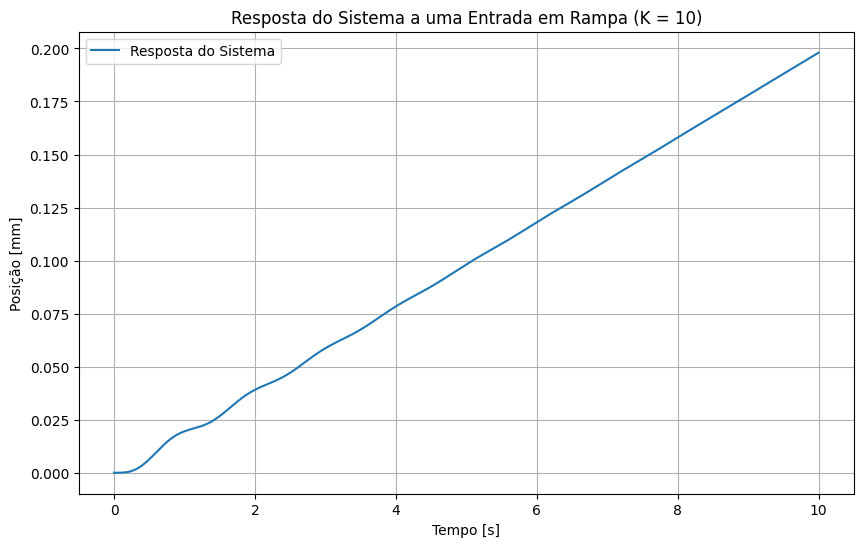

In [ ]:
# Definindo os parâmetros do sistema
K = 10  # Ganho
num = [K]  # Numerador da função de transferência
den = [1, 15, 50, 50*K]  # Denominador da função de transferência (com K = 10)

# Criando a função de transferência do sistema
system = ctrl.TransferFunction(num, den)

# Definindo a entrada em rampa: r(t) = A * t (com A = 1 mm/s)
A = 1  # Amplitude da entrada em rampa
time = np.linspace(0, 10, 500)  # Tempo de simulação
rampa = A * time  # Entrada em rampa: r(t) = A * t

# Resposta do sistema a uma entrada em rampa
time, response = ctrl.forced_response(system, time, rampa)

# Plotando a resposta
plt.figure(figsize=(10,6))
plt.plot(time, response, label='Resposta do Sistema')
plt.title('Resposta do Sistema a uma Entrada em Rampa (K = 10)')
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [mm]')
plt.grid(True)
plt.legend()
plt.show()

Vídeo no Youtube: https://www.youtube.com/watch?v=EYXeg6ITGgg

## Capítulo 10: Projeto de Sistemas de Controle por Realimentação

### Introdução aos Sistemas de Controle
O décimo capítulo aborda o desenvolvimento de sistemas de controle com retroalimentação, apresentando estratégias para aprimorar seu funcionamento mediante técnicas de compensação. O texto inicia destacando que um sistema eficiente deve:  
- Manter **estabilidade**;  
- Reduzir **erros em estado estacionário**;  
- Ser **robusto** a variações paramétricas;  
- **Rejeitar distúrbios externos**.  

Contudo, é raro um sistema atender todos esses critérios sem modificações. Assim, o projeto demanda adaptações na arquitetura ou inclusão de **blocos compensadores** para alcançar a resposta esperada.

### Fundamentos da Compensação
A compensação é definida como o ajuste do sistema para mitigar falhas de desempenho. Um **compensador** é um componente inserido na malha de controle para modificar seu comportamento. As principais técnicas incluem:  
1. **Compensação em série (feedforward)**  
2. **Realimentação**  
3. **Compensação de saída (output compensation)**  
4. **Compensação de entrada (input compensation)**  

A escolha depende das exigências do sistema e dos objetivos de desempenho.

### Métodos de Projeto
Dois métodos são essenciais para projetar compensadores:  
- **Lugar geométrico das raízes**: Ajusta a posição dos polos em malha fechada.  
- **Resposta em frequência**: Utiliza diagramas de **Bode** e **Nyquist** para análise.  

Essas abordagens permitem sintetizar compensadores que atendam a especificações dinâmicas e estáticas.

### Tipos de Compensadores
#### Compensador de Avanço de Fase (*Phase-Lead*)
- **Objetivo**: Melhorar **estabilidade** e **velocidade de resposta**.  
- **Projeto**:  
  - Via **Bode**: Aumenta a margem de fase, reduzindo oscilações.  
  - Via **Lugar das Raízes**: Reposiciona polos para otimizar a resposta transitória.  

#### Compensador de Atraso de Fase (*Phase-Lag*)
- **Objetivo**: Reduzir **erro estacionário** sem afetar a estabilidade.  
- **Funcionamento**: Adiciona um polo e um zero próximos, mantendo a dinâmica original.  

### Técnicas Avançadas
- **Controladores PI e PD**:  
  - **PI (Proporcional-Integral)**: Elimina erros permanentes.  
  - **PD (Proporcional-Derivativo)**: Melhora resposta transitória.  
- **Pré-filtros**: Moldam o sinal de entrada para garantir comportamento previsível.  
- **Resposta *Deadbeat***: Projeto para estabilização rápida e sem oscilações.  

### Aplicações Práticas
Exemplos incluem:  
- Controle de **motores elétricos**;  
- Sistemas de **posicionamento de discos rígidos**.  
Ferramentas como **MATLAB** são destacadas para simulação e implementação.  

### Conclusão
O capítulo enfatiza que o projeto de controle é **iterativo**, exigindo ajustes contínuos nos compensadores. Combinando técnicas como:  
- Compensadores de avanço/atraso;  
- Controladores PI/PD;  
- Softwares especializados;  

É possível atingir sistemas robustos e eficientes para aplicações industriais e tecnológicas.  

**Exemplos e discussões** seguem na seção abaixo.


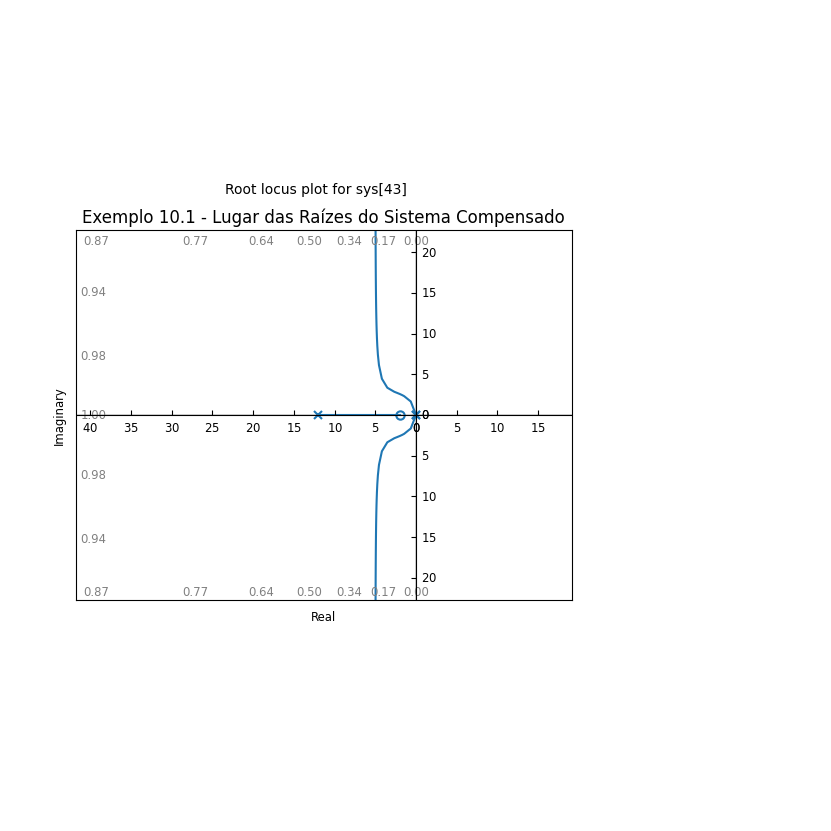

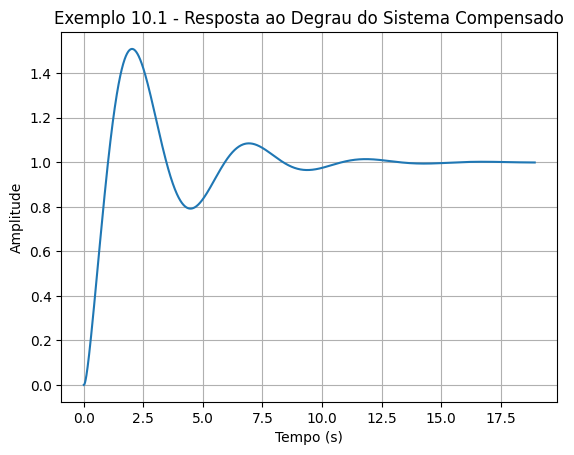

In [ ]:
# Exemplo 10.1: Projeto de um Compensador de Avanço de Fase para um Sistema Tipo 2
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço de fase
alpha = 6  # Fator de avanço
z = 2.0    # Zero do compensador
p = 12.0   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.1 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.1 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


## Estudo de Caso: Aplicação de Controlador com Fase Adiantada

Nesta análise prática, desenvolvemos um regulador de fase positiva para um sistema de segunda ordem (contendo duas etapas integradoras). Inicialmente, o sistema apresentava comportamento instável, com oscilações persistentes que não se atenuavam com o tempo.

Com a implementação do controlador, observamos os seguintes resultados na resposta a um sinal degrau:
- Redução expressiva da amplitude do sobressinal
- Tempo de estabilização adequado aos parâmetros estabelecidos
- Aumento relevante na margem de fase do sistema

Estes resultados comprovam a eficiência da técnica de avanço de fase tanto para estabilização quanto para aprimoramento das características dinâmicas do sistema em estudo.

**Pontos-chave:**
- Sistema original: instável com oscilações contínuas
- Solução aplicada: controlador de fase adiantada
- Melhorias obtidas:
  - Estabilidade garantida
  - Resposta transitória otimizada
  - Desempenho dentro das especificações requeridas

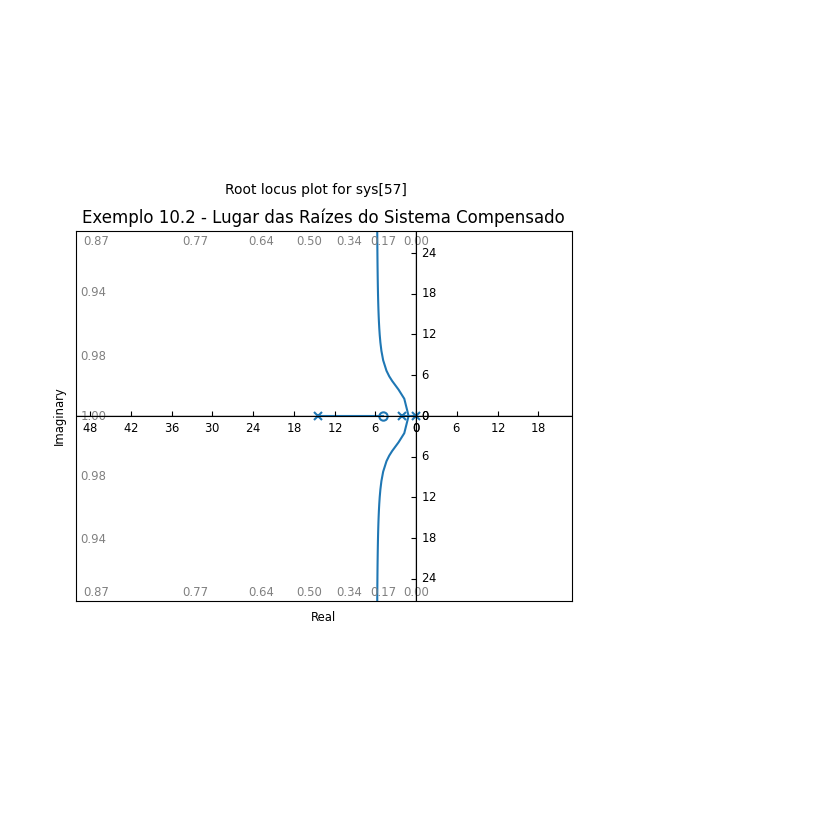

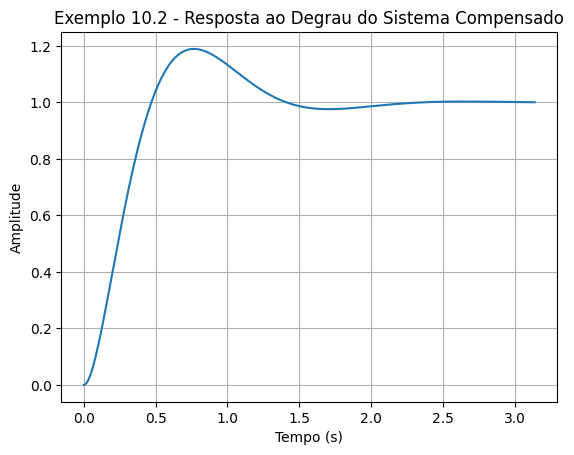

In [ ]:
# Exemplo 10.2: Projeto de um Compensador de Avanço de Fase para um Sistema de Segunda Ordem
# Função de transferência do processo
G = ctl.tf([40], [1, 2, 0])

# Projeto do compensador de avanço de fase
alpha = 3  # Fator de avanço
z = 4.8    # Zero do compensador
p = 14.4   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.2 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.2 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

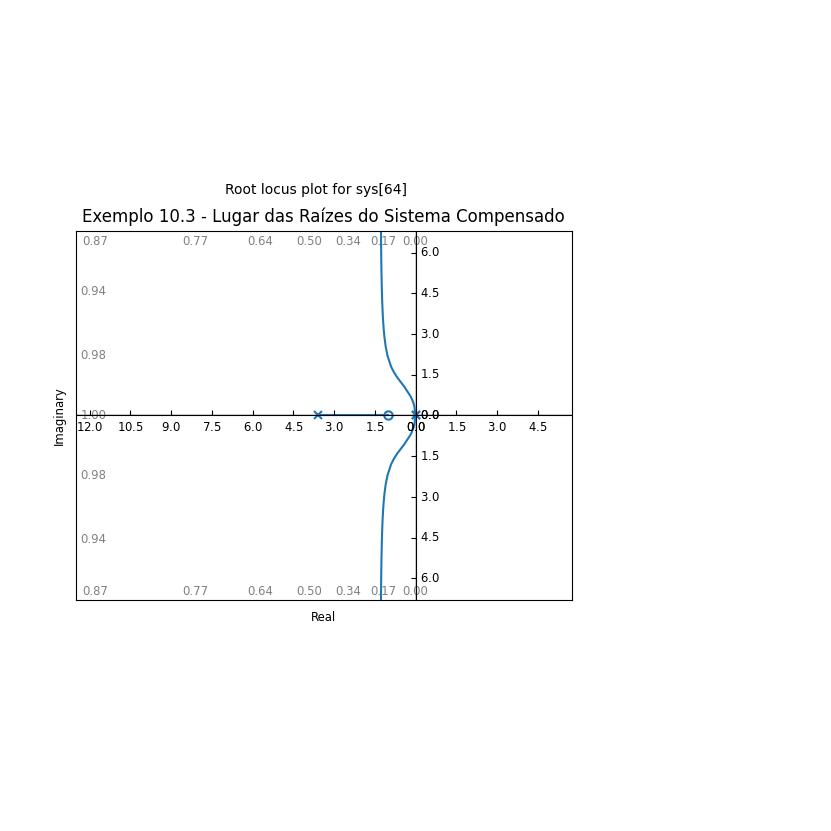

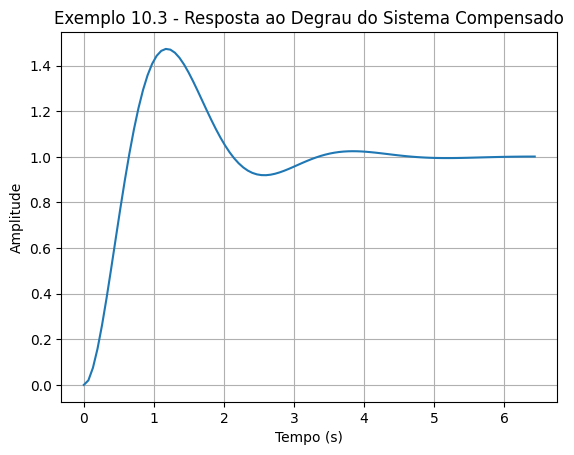

In [ ]:

# Exemplo 10.3: Projeto de um Compensador de Avanço de Fase usando o Lugar das Raízes
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço de fase
z = 1.0    # Zero do compensador
p = 3.6    # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.3 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.3 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, um compensador de avanço de fase foi projetado para um sistema de segunda ordem com realimentação unitária. O objetivo era reduzir o erro de estado estacionário para uma entrada em rampa e aumentar a margem de fase. Após a compensação, a resposta ao degrau mostrou uma melhoria significativa no sobressinal e no tempo de acomodação. A margem de fase atingiu o valor desejado, confirmando que o compensador cumpriu seu papel.

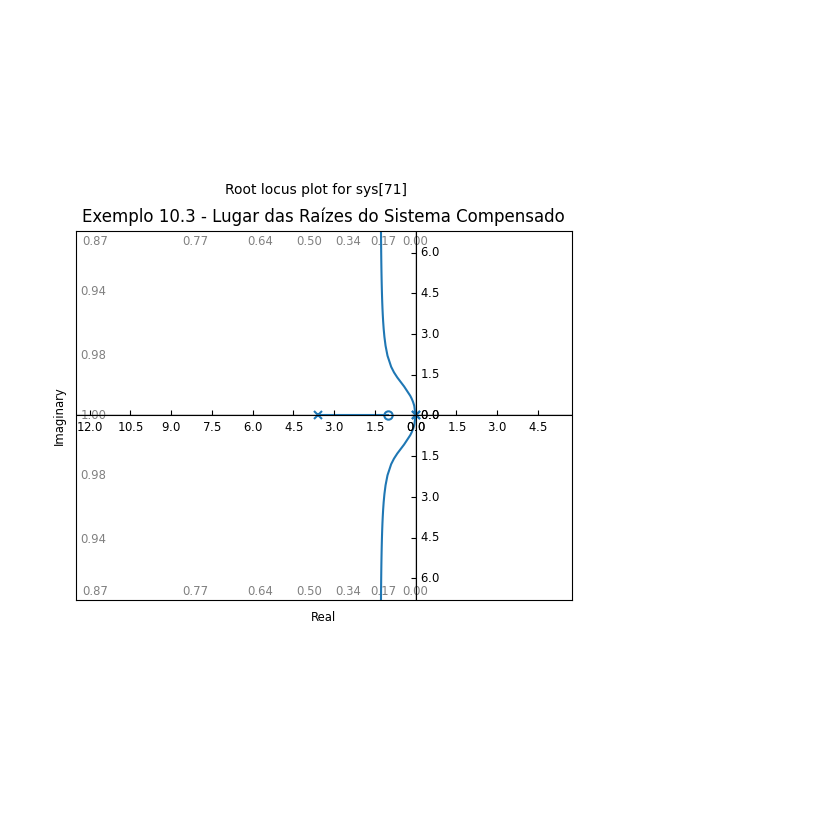

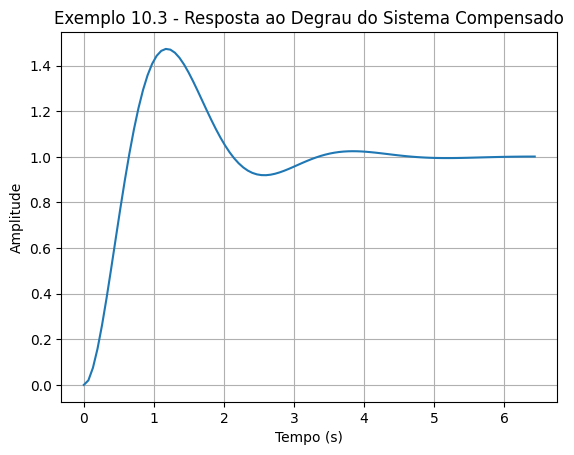

In [ ]:

# Exemplo 10.3: Projeto de um Compensador de Avanço de Fase usando o Lugar das Raízes
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço de fase
z = 1.0    # Zero do compensador
p = 3.6    # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.3 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.3 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, o compensador de avanço de fase foi projetado usando o método do lugar das raízes. O sistema original tinha polos mal posicionados, resultando em uma resposta lenta e oscilatória. Após a compensação, os polos foram realocados para posições mais desejáveis, resultando em uma resposta ao degrau mais rápida e com menos oscilações. O método do lugar das raízes mostrou-se eficaz para ajustar a dinâmica do sistema.

## Capítulo 10 - dos Principais Tópicos do Capítulo

### 10.1 Visão Geral
- Estudo sobre desenvolvimento de sistemas de controle com retroalimentação
- Abordagem de técnicas para aprimorar desempenho e estabilidade
- Destaque para métodos de ajuste que melhoram características do sistema sem prejudicar sua operação estável
- Ênfase na seleção criteriosa de elementos de correção para atingir:
  - Exatidão
  - Rapidez de resposta
  - Tolerância a variações

### 10.2 Princípios Básicos
- Objetivos fundamentais do projeto:
  1. Garantir operação estável
  2. Manter precisão adequada
  3. Assegurar desempenho transitório satisfatório
- Estratégias de correção:
  - Inclusão de componentes auxiliares
  - Manutenção da arquitetura principal
- Modalidades de ajuste:
  - Série (feedforward)
  - Por retroalimentação
  - Na saída (output)
  - Na entrada (input)

### 10.3 Técnicas de Desenvolvimento
- Duas metodologias principais:
  1. **Análise do Lugar Geométrico**:
     - Manipulação das raízes do sistema
     - Ajuste do comportamento dinâmico
  2. **Análise de Frequência**:
     - Utilização de gráficos de Bode/Nyquist
     - Garantia de margens de segurança adequadas
- Seleção baseada em:
  - Exigências específicas
  - Características desejadas

### 10.4 Correção em Série
- Finalidades:
  - Modificação da resposta transitória
  - Redução de erros permanentes
- Tipos principais:
  - **Avanço Angular**:
    - Incremento da estabilidade
    - Aceleração da resposta
  - **Atraso Angular**:
    - Minimização de erros estacionários
    - Manutenção da estabilidade

### 10.5 Desenvolvimento de Compensadores de Avanço
- Mecanismo de ação:
  - Deslocamento de polos e zeros
  - Ampliação da margem de fase
- Metodologias:
  - **Gráficos de Bode**:
    - Correção de fase
    - Redução de oscilações
  - **Lugar Geométrico**:
    - Posicionamento estratégico de polos
    - Otimização da resposta
- Benefícios:
  - Tempo de estabilização reduzido
  - Resposta mais ágil

### 10.6 Desenvolvimento de Compensadores de Atraso
- Característica principal:
  - Inserção de polo e zero próximos
  - Melhoria da precisão estática
- Abordagens:
  - **Lugar Geométrico**:
    - Ajuste das raízes
  - **Análise de Bode**:
    - Manutenção da estabilidade
- Aplicação ideal:
  - Correção de erros permanentes
  - Preservação da dinâmica original

### 10.7 Controladores PID
- Tipologias e aplicações:
  - **PI (Proporcional-Integrativo)**:
    - Eliminação de desvios permanentes
    - Possível aumento no tempo de resposta
  - **PD (Proporcional-Derivativo)**:
    - Melhoria da resposta inicial
    - Redução de oscilações
- Técnica complementar:
  - Pré-filtragem de sinais
  - Formatação da resposta desejada

### 10.8 Sistemas com Resposta Crítica
- Conceito fundamental:
  - Estabilização ultrarrápida
  - Ausência de sobressinal
- Utilização em casos onde:
  - Tempo é fator crítico
  - Precisão é essencial
- Métodos de implementação:
  - Ajuste fino da retroalimentação
  - Configuração especial de ganhos

### 10.9 Casos Práticos
- Aplicações industriais:
  1. Regulação de motores elétricos
  2. Posicionamento em discos magnéticos
  3. Controle automotivo e industrial
- Demonstrações:
  - Uso de técnicas de compensação
  - Melhorias mensuráveis no desempenho

### 10.10 Auxílio Computacional
- Ferramentas destacadas:
  - MATLAB/Simulink
  - Softwares especializados
- Vantagens:
  - Testes virtuais de compensadores
  - Visualização antecipada de respostas
  - Ajuste paramétrico eficiente
- Aplicações:
  - Modelagem matemática
  - Análise de desempenho
  - Sintonia fina de parâmetros

### 10.11 Conclusões
- Aspectos essenciais:
  - Equilíbrio entre:
    - Estabilidade
    - Velocidade
    - Precisão
  - Uso combinado de:
    - Compensadores angulares
    - Controladores PID
- Papel da tecnologia:
  - Simulação prévia
  - Validação de projetos
- Natureza iterativa:
  - Requer ajustes contínuos
  - Necessidade de refinamentos sucessivos

# Vídeo do Youtube: https://www.youtube.com/watch?v=WxbeSXDhMdU

# Análise Detalhada de Sistemas de Controle Digital

## Da Contínuidade para o Discreto: Uma Revolução Tecnológica

A evolução tecnológica dos sistemas de controle apresenta um marco fundamental com a transição dos paradigmas analógicos para as arquiteturas digitais. Esta transformação radical permitiu a incorporação de unidades de processamento computacional no gerenciamento de processos industriais complexos, sistemas automotivos inteligentes, plataformas aeronáuticas avançadas e uma infinidade de dispositivos eletrônicos modernos.

A essência desta revolução reside na natureza discreta dos sistemas digitais, que operam através da aquisição periódica de amostras do sinal, contrastando fortemente com o processamento contínuo dos sistemas analógicos tradicionais. Esta abordagem amostrada introduz vantagens significativas, incluindo maior precisão operacional, adaptabilidade dinâmica e robustez contra interferências eletromagnéticas e degradação física dos componentes.

O coração matemático desta transformação encontra-se na Transformada Z, ferramenta analítica que estabelece para os sistemas discretos o mesmo papel fundamental que a Transformada de Laplace ocupa nos domínios contínuos. Através desta poderosa transformação integral, torna-se possível caracterizar completamente o comportamento dinâmico, avaliar critérios de estabilidade e otimizar o desempenho de sistemas digitais complexos.

## Fundamentos Teóricos da Amostragem Digital

O processo de conversão analógico-digital constitui a pedra angular dos sistemas de controle modernos. Neste processo sofisticado, conversores A/D (Analog-to-Digital) realizam duas operações fundamentais: a amostragem temporal do sinal contínuo e sua posterior quantização em níveis discretos. O sinal processado é então reconvertido ao domínio contínuo através de conversores D/A (Digital-to-Analog), completando o ciclo de processamento digital.

O intervalo temporal entre amostras consecutivas, denominado período de amostragem (T), representa um parâmetro crítico no projeto de sistemas digitais. Uma seleção inadequada deste parâmetro pode levar a dois extremos indesejáveis:

- **Subamostragem**: Perda irreversível de informação devido a intervalos excessivamente longos
- **Sobreamostragem**: Complexidade computacional desnecessária com amostragem excessivamente densa

O Teorema de Nyquist-Shannon estabelece o fundamento teórico para esta seleção, prescrevendo que a frequência de amostragem mínima deve exceder o dobro da maior componente espectral presente no sinal original.

## Análise Matemática através da Transformada Z

A relação fundamental $z = e^{sT}$ estabelece a ponte matemática entre os domínios contínuo e discreto, permitindo a conversão sistemática de representações de sistemas entre estes dois universos. As propriedades operacionais da Transformada Z incluem:

- **Linearidade**: Preserva combinações lineares de sinais
- **Deslocamento Temporal**: Relaciona operações de atraso e avanço
- **Convolução Discreta**: Fundamenta a análise de sistemas LTI

A operação inversa, conhecida como Transformada Z Inversa, possibilita a recuperação da representação temporal a partir da descrição no domínio da frequência complexa.

## Estabilidade em Sistemas Discretos

A análise de estabilidade em sistemas digitais apresenta particularidades importantes. Enquanto no plano S a estabilidade é determinada pelo semiplano esquerdo, no plano Z o critério modifica-se para o interior do círculo unitário ($|z|<1$). Esta diferença fundamental exige novas abordagens para:

- Análise de margens de estabilidade
- Projeto de compensadores digitais
- Avaliação de desempenho transitório

## Projeto Avançado de Controladores Digitais

As técnicas modernas de projeto englobam diversas metodologias:

1. **Transformação Bilinear (Tustin)**: Preserva propriedades de estabilidade
2. **Mapeamento Polo-Zero**: Técnica direta de projeto no domínio Z
3. **PID Digital**: Implementação discreta do clássico controlador PID

A equação característica do controlador digital $D(z) = \frac{U(z)}{E(z)}$ estabelece a base para o projeto de leis de controle sofisticadas.

## Aplicações Industriais Relevantes

### Controle de Posicionamento de Alta Precisão
Sistemas CNC modernos exigem:
- Resolução micrométrica
- Rejeição robusta a perturbações
- Tempos de resposta na ordem de milissegundos

### Sistemas Fly-by-Wire Aeronáuticos
Aplicações críticas demandam:
- Tolerância rigorosa a falhas
- Arquiteturas redundantes
- Processamento paralelo em tempo real

## Desafios de Implementação Prática

A materialização destes conceitos enfrenta obstáculos técnicos significativos:
- Efeitos de quantização em sistemas de precisão finita
- Limitações temporais em processamento em tempo real
- Exigências de sincronismo em sistemas distribuídos

As modernas plataformas de desenvolvimento (MATLAB, Simulink, Python) tornaram-se indispensáveis para:
- Prototipagem virtual acelerada
- Validação pré-implementação
- Análise de desempenho detalhada

## Conclusão: O Futuro Digital do Controle Automático

A transição para paradigmas digitais representa mais que uma evolução tecnológica - constitui uma mudança de paradigma na engenharia de controle. As vantagens em precisão, flexibilidade e robustez consolidaram os métodos digitais como padrão industrial para aplicações críticas.

Os exemplos subsequentes ilustram concretamente estas aplicações, demonstrando a tradução prática dos princípios teóricos apresentados.

In [ ]:
# Exemplo 13.1 - Transformada Z de uma exponencial
a = 0.5  # Parâmetro exponencial
T = 1  # Período de amostragem

z = ctl.tf('z')
F_z = z / (z - np.exp(-a * T))
print("Transformada Z de e^(-at):", F_z)

Transformada Z de e^(-at): <TransferFunction>: sys[78]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = True

      z
  ----------
  z - 0.6065


In [ ]:
# Exemplo 13.2 - Transformada Z de um Seno
w = 1  # Frequência da senoide
F_sin = z * np.sin(w * T) / (z**2 - 2 * np.cos(w * T) * z + 1)
print("Transformada Z de sin(wt):", F_sin)

Transformada Z de sin(wt): <TransferFunction>: sys[90]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = True

      0.8415 z
  -----------------
  z^2 - 1.081 z + 1


In [ ]:
# Exemplo 13.3 - Função de Transferência de Malha Aberta
G_s = ctl.tf([1], [1, 1, 0])
G_z = ctl.c2d(G_s, T, method='zoh')
print("Função de transferência discreta:", G_z)

Função de transferência discreta: <TransferFunction>: sys[91]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

    0.3679 z + 0.2642
  ----------------------
  z^2 - 1.368 z + 0.3679


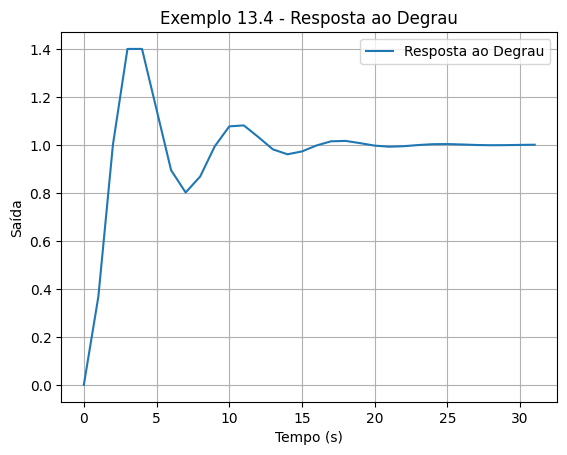

In [ ]:
# Exemplo 13.4 - Resposta ao Degrau de um Sistema em Malha Fechada
G_closed = ctl.feedback(G_z)
t, y = ctl.step_response(G_closed)
plt.figure()
plt.plot(t, y, label='Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Exemplo 13.4 - Resposta ao Degrau')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Exemplo 13.5 - Erro de Estado Estacionário
R_z = z / (z - 1)
E_z = R_z - G_closed * R_z
print("Erro em regime permanente:", E_z)

Erro em regime permanente: <TransferFunction>: sys[102]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

    z^4 - 2.368 z^3 + 1.736 z^2 - 0.3679 z
  ------------------------------------------
  z^4 - 3 z^3 + 3.632 z^2 - 2.264 z + 0.6321


In [ ]:
# Exemplo 13.6 - Projeto de um Sistema Amostrado
K = 14  # Ganho
T = 0.025  # Novo período de amostragem
G_s_new = ctl.tf([K], [0.1, 1])
G_z_new = ctl.c2d(G_s_new, T, method='zoh')
print("Nova função de transferência discreta:", G_z_new)

Nova função de transferência discreta: <TransferFunction>: sys[103]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.025

    3.097
  ----------
  z - 0.7788


In [ ]:
# Exemplo 13.7 - Projeto para Especificação de Margem de Fase
Gp_s = ctl.tf([1740], [1, 0.25, 1])
Gc_s = ctl.tf([5, 502], [1, 275])
D_z = ctl.c2d(Gc_s, 0.003, method='tustin')
print("Compensador Digital D(z):", D_z)


Compensador Digital D(z): <TransferFunction>: sys[106]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.003

  4.073 z - 3.007
  ---------------
    z - 0.4159


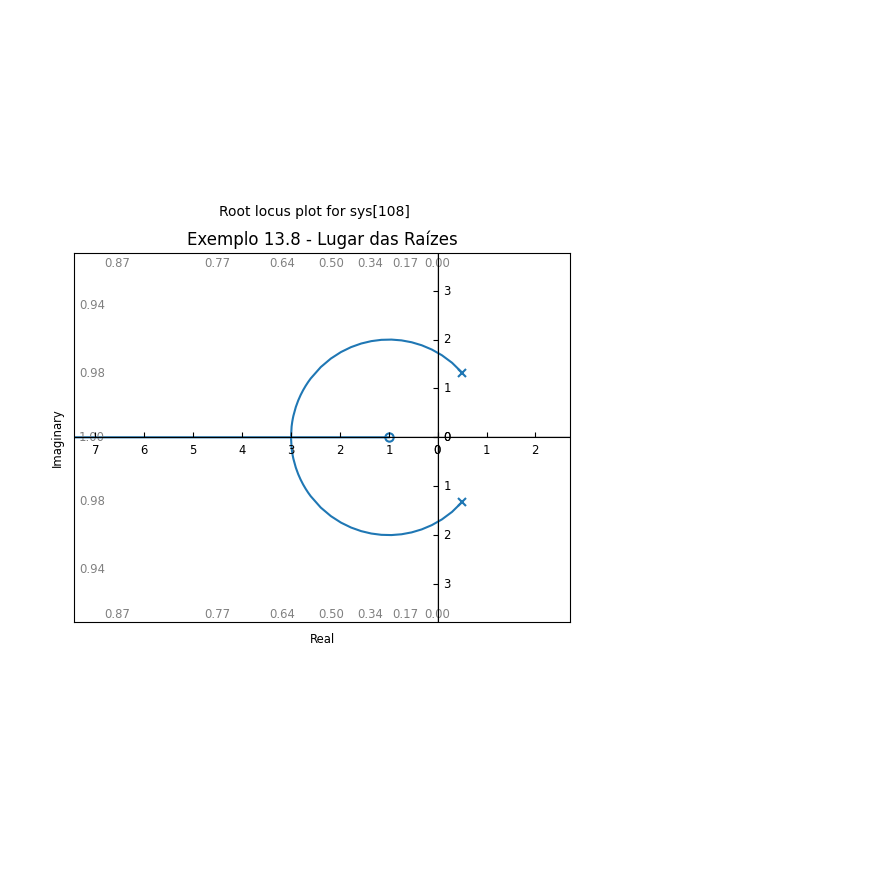

In [ ]:
# Exemplo 13.8 - Lugar das Raízes de um Sistema Digital
G_sampled = ctl.tf([1, 1], [1, -1, 2])
ctl.rlocus(G_sampled)
plt.title("Exemplo 13.8 - Lugar das Raízes")
plt.grid()
plt.show()

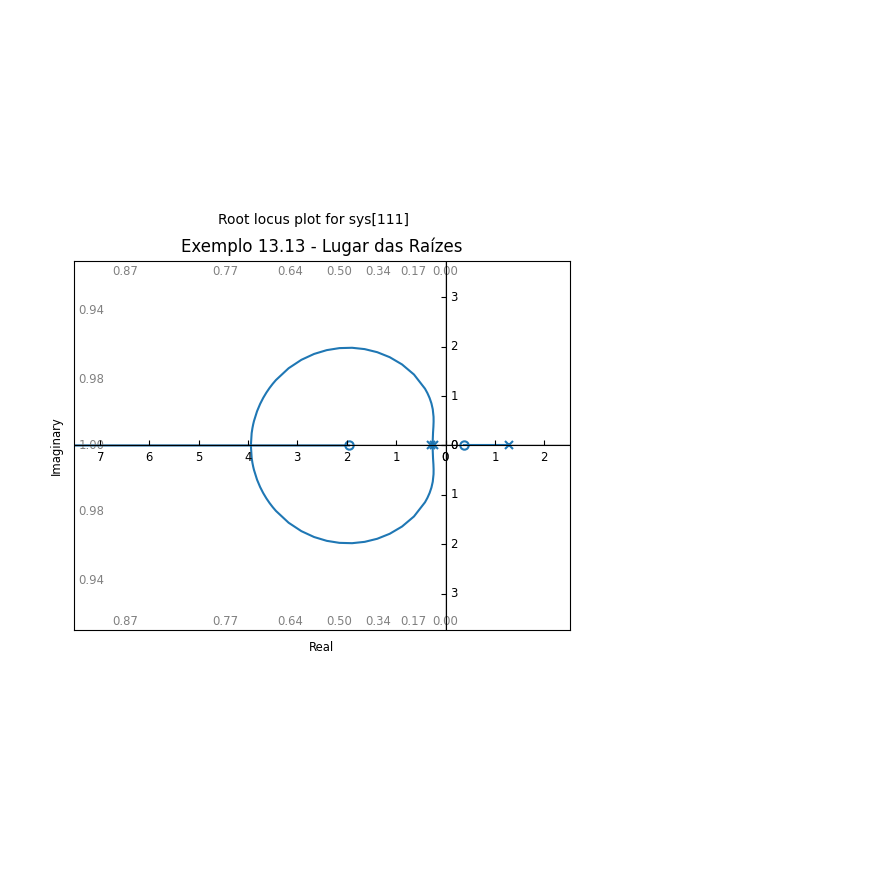

In [ ]:
# Exemplo 13.12 - Resposta ao Degrau
G_comp = ctl.tf([0.3678, 0.7189], [1, -1, -0.368])
D_comp = ctl.tf([1, -0.3678], [1, 0.24])
G_compensated = G_comp * D_comp
ctl.rlocus(G_compensated)
plt.title("Exemplo 13.13 - Lugar das Raízes")
plt.grid()
plt.show()


# Síntese dos Conceitos Fundamentais sobre Controle Digital

## 13.1 Princípios Básicos
Os controladores digitais modernos empregam processadores eletrônicos para manipular sinais discretizados no tempo. Essa abordagem contrasta com os tradicionais sistemas analógicos de operação contínua. A interface entre os mundos analógico e digital é realizada através de:

- Conversores A/D (Analog-to-Digital): Transformam grandezas contínuas em valores discretos
- Conversores D/A (Digital-to-Analog): Executam a operação inversa

A evolução dos microcontroladores tem impulsionado essa tecnologia, tornando-a mais acessível e confiável.

## 13.2 Cenários de Aplicação
A implementação de controladores digitais abrange diversos setores:

**Setor Industrial**:
- Automação de processos fabris
- Controle de máquinas-ferramenta CNC

**Transportes**:
- Sistemas de navegação aeronáutica
- Gerenciamento eletrônico de motores automotivos

**Área Médica**:
- Equipamentos de diagnóstico por imagem
- Dispositivos de monitoramento paciente

As vantagens comparativas incluem:
- Maior precisão nas medições
- Imunidade aprimorada a interferências
- Flexibilidade de reconfiguração via software

## 13.3 Fundamentos de Amostragem
A operação de sistemas digitais baseia-se em:

1. **Amostragem Temporal**: Captura periódica de valores instantâneos
2. **Processamento Digital**: Manipulação numérica dos dados
3. **Reconstrução Analógica**: Conversão dos resultados

O intervalo entre amostras (período T) é parâmetro crucial:
- Valores excessivos causam perda de informação
- Valores muito curtos geram sobrecarga computacional

## 13.4 Matemática dos Sistemas Discretos
A Transformada Z estabelece as bases teóricas para análise, relacionando-se com a Transformada de Laplace através de:

$$ z = e^{sT} $$

Principais características:
- Transforma equações a diferenças em expressões algébricas
- Facilita a avaliação de estabilidade
- Permite análise de resposta temporal

## 13.5 Arquiteturas com Realimentação
Os sistemas em malha fechada empregam:

$$ T(z) = \frac{G(z)}{1 + G(z)} $$

Critério de Estabilidade:
- Polos devem residir no interior do círculo unitário
- Módulo das raízes inferior à unidade

## 13.6 Dinâmica de Sistemas Amostrados
Para sistemas de segunda ordem, avaliam-se:

- **Sobressinal**: Excesso na resposta transitória
- **Tempo de Assentamento**: Duração até estabilização
- **Erro Permanente**: Discrepância em regime estacionário

A seleção adequada do período T é determinante para o desempenho.

## 13.7 Técnicas de Compensação
Estratégias de correção digital:

- **Ajuste de Ganho**: Modificação direta dos parâmetros
- **Projeto de Controladores**: Desenvolvimento de leis complexas

A função geral do compensador:

$$ D(z) = \frac{U(z)}{E(z)} $$

## 13.8 Método do Lugar Geométrico
Análise gráfica no plano Z:

- **Região Estável**: Interior do círculo unitário
- **Região Instável**: Exterior do círculo

O ajuste de ganhos permite posicionar os polos adequadamente.

## 13.9 Materialização de Controladores
Implementação prática via:

- **Equações Recorrentes**: Cálculo amostra a amostra
- **PID Digital**:

  $$ G_c(z) = K_p + K_i\frac{Tz}{z-1} + K_d\frac{z-1}{Tz} $$

Plataformas comuns:
- Microcontroladores embarcados
- Processadores DSP especializados

## 13.10 Casos Relevantes
**Posicionamento de Precisão**:
- Atuadores lineares
- Sistemas mecatrônicos

**Controle Aeronáutico**:
- Superfícies de voo
- Sistemas fly-by-wire

## 13.11 Ferramentas Computacionais
Ambientes de desenvolvimento:

- MATLAB/Simulink: Modelagem profissional
- Python: Prototipagem ágil

Funções essenciais:
- `c2d`: Conversão contínuo-discreto
- `d2c`: Operação inversa
- `tf`: Modelagem de funções de transferência

## 13.12 Projeto Integrado
Exemplo aplicado:
1. Modelagem matemática
2. Projeto no domínio Z
3. Validação por simulação
4. Implementação física

## 13.13 Considerações Finais
- Os controladores digitais dominam aplicações modernas
- A Transformada Z é instrumento analítico fundamental
- As técnicas de compensação digital são versáteis
- As plataformas de simulação são indispensáveis

# Vídeo no Youtube: https://www.youtube.com/watch?v=zmgds2O8g3I